- https://www.kaggle.com/code/nournouur/m-thodes-de-monte-carlo-black-jack-frozenlake
- https://www.kaggle.com/code/positivecoder/rl-frozen-lake-solution-using-value-iteration
- https://www.youtube.com/watch?v=l87rgLg90HI
- https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438
- https://zoo.cs.yale.edu/classes/cs470/materials/hws/hw7/FrozenLake.html
- https://mlabonne.github.io/blog/reinforcement%20learning/q-learning/frozen%20lake/gym/tutorial/2022/02/13/Q_learning.html

Q-Learner:
- https://www.kaggle.com/code/sangnguyenai2019/frozen-lake-q-learning-a-parameter-study
- https://medium.com/mlearning-ai/a-deep-dive-into-reinforcement-learning-q-learning-and-deep-q-learning-on-a-10x10-frozenlake-c76d56810a46

In [1]:
!pip install pygame

In [2]:
!pip install gym==0.23.1

In [3]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pygame
import random
import seaborn as sns
import time


from gym.envs.toy_text.frozen_lake import generate_random_map
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

c:\users\steve\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backend_bases.py:57: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION
c:\users\steve\appdata\local\programs\python\python37\lib\site-packages\pandas\_testing.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import pandas._libs.testing as _testing
c:\users\steve\appdata\local\programs\python\python37\lib\site-packages\scipy\special\orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will no

In [4]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.11.2
pygame==2.1.2
pandas==1.0.5
numpy==1.21.6
matplotlib==3.1.1
gym==0.23.1


# Helpful Functions

In [5]:
def play_episodes(env, n_episodes, policy, random = False, rewards_aggrated=True):
    """
    This fucntion plays the given number of episodes given by following a policy or sample randomly from action_space.
    
    Parameters:
        enviorment: openAI GYM object
        n_episodes: number of episodes to run
        policy: Policy to follow while playing an episode
        random: Flag for taking random actions. if True no policy would be followed and action will be taken randomly
        
    Return:
        wins: Total number of wins playing n_episodes
        total_reward: Total reward of n_episodes
        avg_reward: Average reward of n_episodes
    
    """
    wins = 0
    total_reward = 0
    rewards = []
    
    
    for episode in range(n_episodes):
        done = False
        run_e_rewards = 0
        # reset the enviorment every time when playing a new episode
        state = env.reset()
        
        while not done:
            if random:
                action = env.action_space.sample()
            else:
                action = policy[state]

            next_state, reward,  done, info = env.step(action)

            total_reward += reward
            run_e_rewards += reward
            state = next_state
            
            if done and reward == 1:
                wins += 1
        
        rewards.append(run_e_rewards)
                
    # calculate average reward
    average_reward = total_reward / n_episodes
    
    if rewards_aggrated:
        return wins, total_reward, average_reward
    else:
        return wins, rewards

In [6]:
def value_iteration(env,max_iteration=1000,discount_factor=1):
    threshold=1e-2
    deltas = []
    value_table=np.zeros(env.observation_space.n)
    for i in range(max_iteration):
        prev_table=np.copy(value_table)
        for j in range(env.observation_space.n):
            q_values=[sum([prob*(r+discount_factor*prev_table[s]) for prob,s,r,x in env.P[j][a]]) for a in range(env.action_space.n)]
            value_table[j]=max(q_values)
            
        d = np.sum(np.fabs(prev_table-value_table))
        deltas.append(d)
        if (d <= threshold):
            break
#     print(f"Iterations: {i}")
    return value_table,deltas

In [7]:
def extract_policy(value_table, env, gamma=0.9):
    policy=np.zeros(env.observation_space.n)
    for j in range(env.observation_space.n):
        q_values=[sum([prob*(r+gamma*value_table[s]) for prob,s,r,x in env.P[j][a]]) for a in range(env.action_space.n)]
        policy[j]=np.argmax(np.array(q_values))
    return policy

In [8]:
## Author: Diganta Kalita
## https://github.com/dxganta/solving_openai/blob/master/FrozenLake8x8/frozenLake8x8.py

def get_score(env, policy, episodes=1000):
    misses = 0
    steps_list = []
    truncated=0
    for episode in range(episodes):
        observation = env.reset()
        steps=0
        while True:
            action = policy[observation]
            observation, reward, done, info = env.step(action)
            steps+=1
            if info.get('TimeLimit.truncated'):
                truncated += 1
                break
            if done and reward == 1:
                steps_list.append(steps)
                break
            elif done and reward == 0:
                misses += 1
                break
    print('----------------------------------------------')
    print('Number of Episodes ({:.0f}) truncated'.format(truncated))
    print('You took an average of {:.0f} steps to get the frisbee'.format(np.mean(steps_list)))
    print('And you fell in the hole {:.2f} % of the times'.format((misses/(episodes-truncated)) * 100))
    print(f'Loses: {misses}')
    print(f'Wins: {len(steps_list)}')
    print('----------------------------------------------')

## Helper Functions (PI)

In [9]:
def policy_eval(env, policy, V, discount_factor):
    """
    Helper function to evaluate a policy.
    
    Arguments:
        env: openAI GYM Enviorment object.
        policy: policy to evaluate.
        V: Estimated Value for each state. Vector of length nS.
        discount_factor: MDP discount factor.
    Return:
        policy_value: Estimated value of each state following a given policy and state-value 'V'. 
        
    """
    policy_value = np.zeros(env.observation_space.n)
    for state, action in enumerate(policy):
        for probablity, next_state, reward, info in env.P[state][action]:
            policy_value[state] += probablity * (reward + (discount_factor * V[next_state]))
            
    return policy_value

In [10]:
def policy_iteration(env, discount_factor = 0.999, max_iteration = 300, early_stopping=True):
    """
    Algorithm to solve MPD.
    
    Arguments:
        env: openAI GYM Enviorment object.
        discount_factor: MDP discount factor.
        max_iteration: Maximum No.  of iterations to run.
        
    Return:
        V: Optimal state-Value function. Vector of lenth nS.
        new_policy: Optimal policy. Vector of length nS.
    
    """
    V = np.zeros(env.observation_space.n)
    
    # intialize a random policy
    policy = np.random.randint(0, 4, env.observation_space.n)
    prev_policy = np.copy(policy)
    prev_V = np.copy(V)
    
    deltas = []
    
    for i in range(max_iteration):
        V = policy_eval(env, policy, V, discount_factor)
        policy = extract_policy(V, env, discount_factor)
        
#         d = 1 - np.sum(np.equal(policy, policy_prev))/env.observation_space.n
#         d = np.sum(np.fabs(prev_policy-policy))
        d = np.sum(np.fabs(prev_V-V))
        deltas.append(d)
        
        if i%5==0:
            if np.all(np.isclose(policy, prev_policy)) and early_stopping:
    #                 print('policy converged at iteration %d' %(i+1))
                break
            prev_policy = np.copy(policy)
        prev_V = np.copy(V)
            

            
    return V, policy, deltas

## Helpful Function (QL)

In [11]:
def q_learning(env,discount_factor=0.99,train_episodes = 1000,decay=0.01,init_learning_rate=0.3,decay_learning_rate=0.001, early_stopping=False):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    test_episodes = 100
    max_steps = 100
    epsilon = 1
    max_epsilon = 1
    min_epsilon = 0.01
    learning_rate = init_learning_rate
    max_learning_rate = init_learning_rate
    min_learning_rate = 0.01
    env.reset(seed=8)
    training_rewards = []
    epsilons = []
    training_times=[]
    deltas=[]
    init_time= time.perf_counter()
    for episode in range(train_episodes):
        state = env.reset()
        total_training_rewards = 0
        prev_Q = np.copy(Q)

        for step in range(max_steps):
            random.seed(8)
            if random.uniform(0, 1) > epsilon:
                action = np.argmax(Q[state,:])   #Exploit
            else:
                action = env.action_space.sample() #Explore

            new_state, reward, done, info = env.step(action)

            Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
            
            total_training_rewards += reward
            state = new_state

            #Ending the episode
            if done:
    #             print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
        learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate)*np.exp(-decay_learning_rate*episode)

        training_rewards.append(total_training_rewards)
        epsilons.append(epsilon)
        training_times.append((time.perf_counter()-init_time))
        
        d = np.sum(np.fabs(prev_Q-Q))
        deltas.append(d)
        
        if (np.all(np.isclose(Q, prev_Q))) and early_stopping:
            break
        
        
    return training_rewards,training_times,Q,deltas

In [12]:
import pandas as pd

def get_sma(rates, window):
    return rates.rolling(window).mean()

def get_bollinger_bands(rates, window=20):
    sma = get_sma(rates, window) # <-- Get SMA for 20 days
    std = rates.rolling(window).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    bollinger_down[bollinger_down<0]=0
    return bollinger_up, bollinger_down

# RANDOM ACTIONS (S)

In [13]:
np.random.seed(9)

In [14]:
size_s = 8

env_s_slippery = gym.make('FrozenLake-v1', desc=generate_random_map(size=size_s),is_slippery=True)
env_s_not_slippery = gym.make('FrozenLake-v1', desc=generate_random_map(size=size_s),is_slippery=False)

In [15]:
env_s_slippery.reset()

0

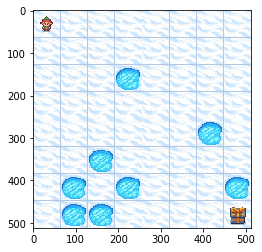

In [20]:
plt.imshow(env_s_slippery.render(None))

This is play until you win!

In [16]:
# runs_s_wins_only = []
# for i in range(100):
#     state = env_s_slippery.reset()
#     counter = 0
#     reward = None
#     rewards = 0
# #     print(i)
#     while reward != 1 and counter < 50000:
#         state, reward, done, info = env_s_slippery.step(env_s_slippery.action_space.sample())
#         rewards += reward
#         counter += 1

#     runs_s_wins_only.append(rewards)

This is play until the game is DONE. Env can terminate (around 800 episodes)

In [17]:
# runs_s_done = []
# wins_s_done=0
# for _ in range(1000):
#     state = env_s_slippery.reset()
#     counter = 0
#     reward = None
#     done = False
#     while reward != 1 and not done:
#         state, reward, done, info = env_s_slippery.step(env_s_slippery.action_space.sample())
#         counter += reward
#         wins_s_done += reward == 1

#     runs_s_done.append(counter)

In [18]:
# sns.set(font_scale=1.0)
# plt.hist(runs_s_done,bins=20)
# plt.xticks(rotation=90)
# plt.xlabel("Total Rewards")
# plt.title("Rewards (Play until a Win)")
# plt.show()

In [21]:
env_s_slippery.reset()
n_episodes = 1000
wins, rewards_random = play_episodes(env_s_slippery, n_episodes, None, random = True, rewards_aggrated=False)
print(f'Win Percentage with Random Policy: {wins/n_episodes*100}%')
print(f"Average rewards with Random Policy: {np.mean(rewards_random)}")

Win Percentage with Random Policy: 0.3%
Average rewards with Random Policy: 0.003


# VALUE ITERATION (S)

### By Gamma

In [22]:
vi_deltas_by_gamma = []
gammas = np.arange(0.39,1.0,0.2)

# Randomly Generated Map
for g in gammas:
    env_s_slippery.reset()
    optimal_function, d_vi = value_iteration(env_s_slippery,discount_factor=g)
    vi_deltas_by_gamma.append(d_vi)
    r = np.mean(optimal_function)
    print(f'Gamma: {g}, Iterations: {len(d_vi)}, Reward: {r}')
    

Gamma: 0.39, Iterations: 5, Reward: 0.008511906874999997
Gamma: 0.5900000000000001, Iterations: 9, Reward: 0.012963374785638138
Gamma: 0.7900000000000001, Iterations: 18, Reward: 0.02688954989780341
Gamma: 0.9900000000000002, Iterations: 168, Reward: 0.47022577454017195


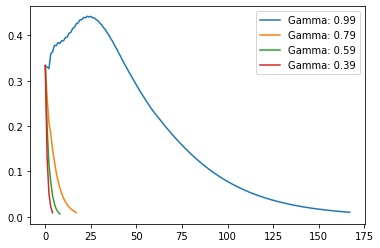

In [23]:
for i in range(len(gammas)-1,-1,-1):
    plt.plot(vi_deltas_by_gamma[i],label=f'Gamma: {np.round(gammas[i],2)}')

plt.legend()

### By Iteration

In [24]:
itr_vi = range(2,202,2)

rewards_vi_gamma = []
run_times_vi_gamma = []
values_funs_vi_gamma = []
policies_vi_gamma = []

for g in gammas:
    rewards_vi=[]
    run_time_vi=[]
    for i in itr_vi:
        env_s_slippery.reset()
        st_time = time.perf_counter()
        V, d_vi = value_iteration(env_s_slippery.env, discount_factor = g, max_iteration = i)
        run_time_vi.append(time.perf_counter() - st_time)
        
        env_s_slippery.reset()
        opt_policy_vi = extract_policy(V, env_s_slippery,gamma=g)
        wins, total_reward, avg_reward = play_episodes(env_s_slippery, 10, opt_policy_vi, random = False)
        rewards_vi.append(avg_reward)
    values_funs_vi_gamma.append(V)
    policies_vi_gamma.append(opt_policy_vi)
    rewards_vi_gamma.append(rewards_vi)
    run_times_vi_gamma.append(run_time_vi)
    print(f'Gamma: {g}, Reward: {rewards_vi[-1]}, Win %: {wins/10*100}, Run-time: {np.sum(run_time_vi)}')

Gamma: 0.39, Reward: 0.0, Win %: 0.0, Run-time: 0.4370271000000656
Gamma: 0.5900000000000001, Reward: 0.1, Win %: 10.0, Run-time: 0.7394460000000862
Gamma: 0.7900000000000001, Reward: 0.4, Win %: 40.0, Run-time: 1.4828587999998888
Gamma: 0.9900000000000002, Reward: 0.8, Win %: 80.0, Run-time: 10.085686500000051


In [25]:
np.array(rewards_vi_gamma).mean(axis=1)

array([0.   , 0.186, 0.574, 0.656])

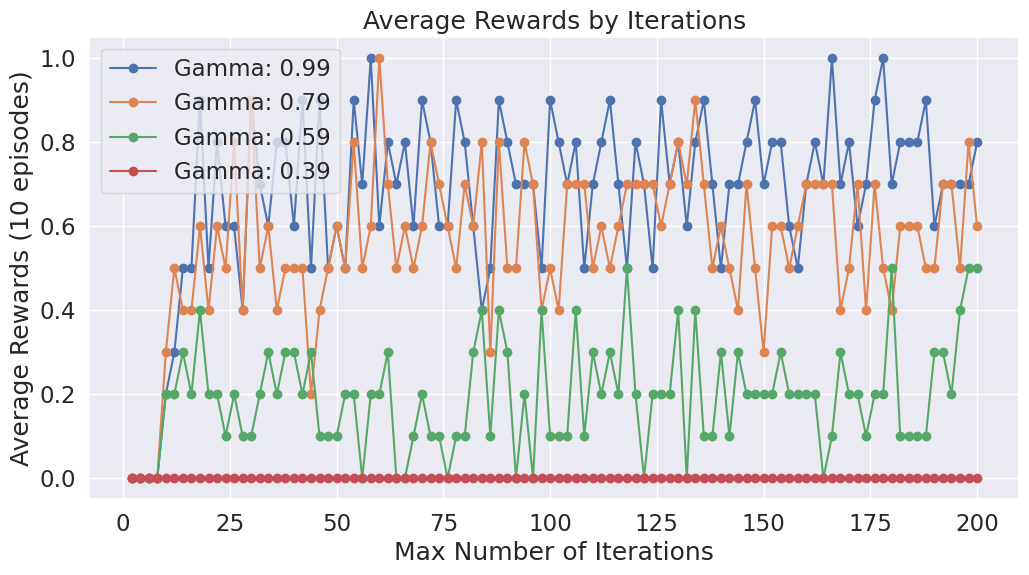

In [25]:
sns.set(font_scale=1.5)

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,rewards_vi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Max Number of Iterations')
plt.ylabel('Average Rewards (10 episodes)')
plt.title('Average Rewards by Iterations')
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

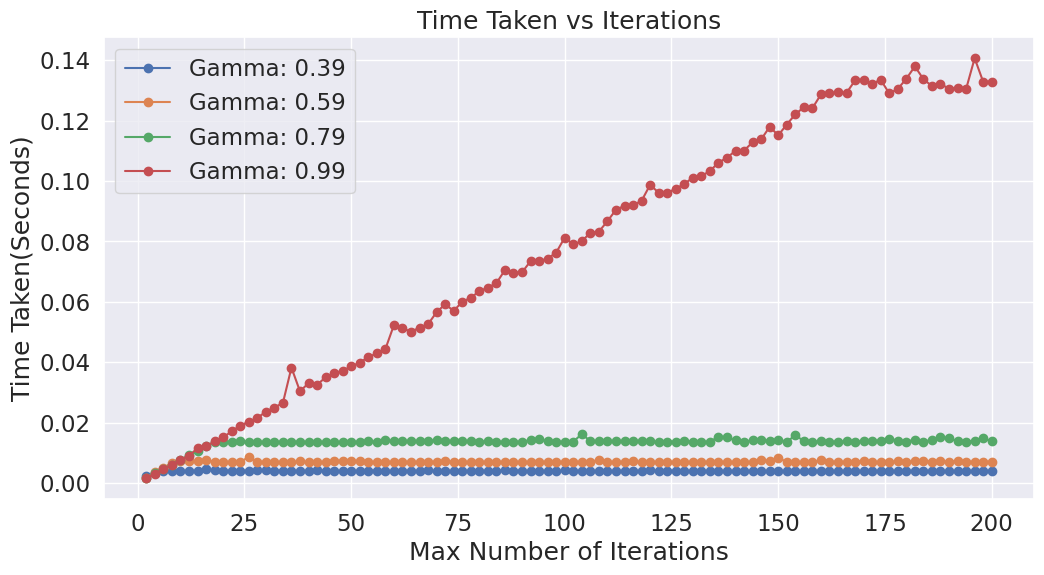

In [26]:
sns.set(font_scale=1.5)

for i in range(len(gammas)):
    plt.plot(itr_vi,run_times_vi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Max Number of Iterations')
plt.ylabel('Time Taken(Seconds)')
plt.title('Time Taken vs Iterations')
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

In [27]:
## env_s_slippery.reset()
V_vi = None
times_vi = []
for _ in range(5):
    s_time = time.perf_counter()
    V_vi,_ = value_iteration(env_s_slippery,discount_factor=0.99)
    times_vi.append(time.perf_counter() - s_time)
    
policy_vi = extract_policy(V_vi, env_s_slippery)


In [28]:
env_s_slippery.reset()

n_episodes = 1000
wins, rewards_vi = play_episodes(env_s_slippery, n_episodes, policy_vi, random = False,rewards_aggrated=False)
print(f'Win Percentage with Value Iteration: {wins/n_episodes*100}%')
print(f"Average rewards with Value Iteration: {np.mean(rewards_vi)}")
print(f"Average times with Value Iteration: {np.mean(times_vi)}")

Win Percentage with Value Iteration: 72.39999999999999%
Average rewards with Value Iteration: 0.724
Average times with Value Iteration: 0.17164712999997392


## POLICY ITERATION (S)

### By Gamma

In [29]:
#Calling Functions to get the optimum policy
np.random.seed(8)

pi_deltas_by_gamma = []
pi_iterations_by_gamma = []
pi_ave_reward_by_gamma = []
pi_times_by_gamma = []
pi_evals_by_gamma = []

# Randomly Generated Map
for g in gammas:
    env_s_slippery.reset()
    st_time = time.perf_counter()
    V, _, d_pi = policy_iteration(env_s_slippery,discount_factor=g, early_stopping=True)
    pi_times_by_gamma.append(time.perf_counter()-st_time)
    pi_iterations_by_gamma.append(len(d_pi))
    pi_deltas_by_gamma.append(d_pi)
    r = np.mean(V)
    pi_ave_reward_by_gamma.append(r)
    print(f'Gamma: {g}, Iterations: {len(d_pi)}, Reward: {r}')

Gamma: 0.39, Iterations: 41, Reward: 0.008604611132351163
Gamma: 0.5900000000000001, Iterations: 21, Reward: 0.01310710562556629
Gamma: 0.7900000000000001, Iterations: 26, Reward: 0.027373112256567456
Gamma: 0.9900000000000002, Iterations: 66, Reward: 0.36464455165525617


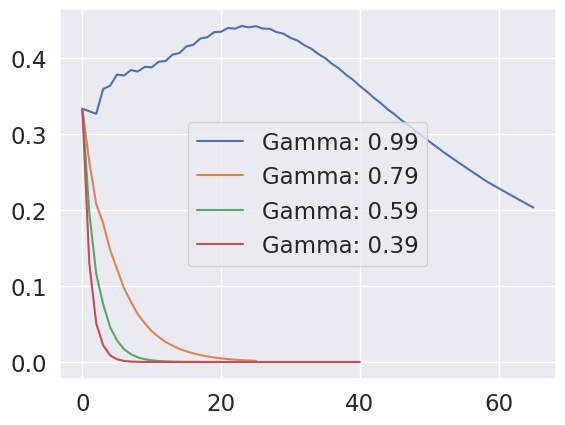

In [30]:
for i in range(len(gammas)-1,-1,-1):
    plt.plot(pi_deltas_by_gamma[i],label=f'Gamma: {np.round(gammas[i],2)}')

plt.legend()

### By Iterations

In [31]:
# itr_pi = range(35)

rewards_pi_gamma = []
run_times_pi_gamma = []
values_funs_pi_gamma = []
policies_pi_gamma = []

for g in gammas:
    rewards_pi=[]
    run_time_pi=[]
    for i in itr_vi:
        env_s_slippery.reset()
        st_time = time.perf_counter()
        V, opt_policy_pi, _ = policy_iteration(env_s_slippery,discount_factor=g, max_iteration = i,early_stopping=True)
        run_time_pi.append(time.perf_counter() - st_time)
        
        env_s_slippery.reset()
        wins, total_reward, avg_reward = play_episodes(env_s_slippery, 10, opt_policy_pi, random = False)
        rewards_pi.append(avg_reward)
    values_funs_pi_gamma.append(V)
    policies_pi_gamma.append(opt_policy_pi)
    rewards_pi_gamma.append(rewards_pi)
    run_times_pi_gamma.append(run_time_pi)
    print(f'Gamma: {g}, Reward: {rewards_pi[-1]}, Run-time: {np.sum(run_time_pi)}')

Gamma: 0.39, Reward: 0.8, Run-time: 5.045226453999703
Gamma: 0.5900000000000001, Reward: 0.2, Run-time: 2.919869985000787
Gamma: 0.7900000000000001, Reward: 0.5, Run-time: 3.659464345998458
Gamma: 0.9900000000000002, Reward: 0.9, Run-time: 7.836348994001128


In [32]:
np.array(rewards_pi_gamma).mean(axis=1)

array([0.581, 0.567, 0.551, 0.672])

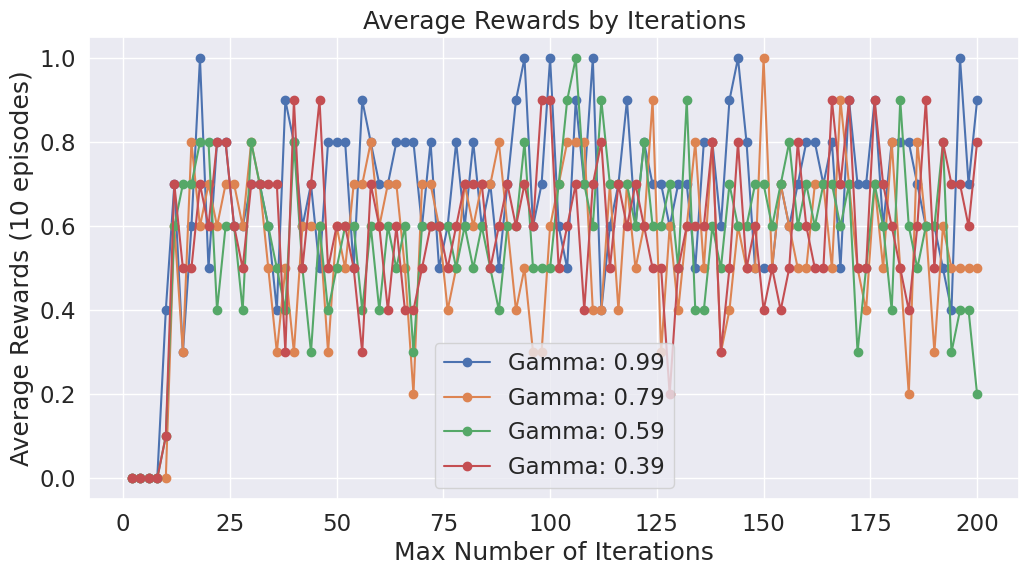

In [33]:
sns.set(font_scale=1.5)

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,rewards_pi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Max Number of Iterations')
plt.ylabel('Average Rewards (10 episodes)')
plt.title('Average Rewards by Iterations')
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

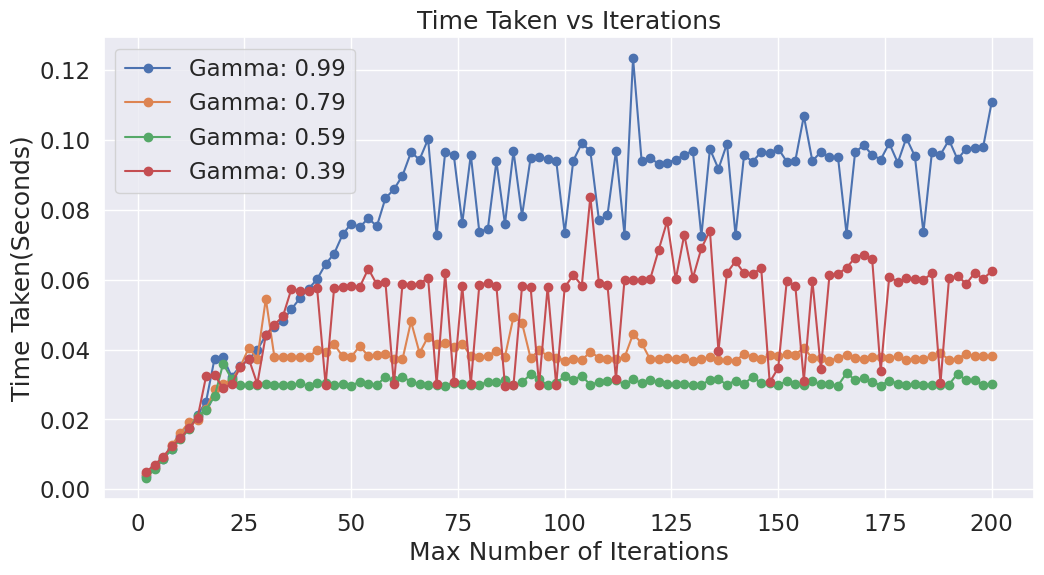

In [34]:
sns.set(font_scale=1.5)

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,run_times_pi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Max Number of Iterations')
plt.ylabel('Time Taken(Seconds)')
plt.title('Time Taken vs Iterations')
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

In [35]:
env_s_slippery.reset()
V_pi = None
times_pi = []
for _ in range(5):
    s_time = time.perf_counter()
    V_pi, policy_pi, _ = policy_iteration(env_s_slippery,discount_factor=0.99,early_stopping=True)
    times_pi.append(time.perf_counter() - s_time)
    
# policy_pi = extract_policy(V_pi, env)


In [36]:
env_s_slippery.reset()

n_episodes = 1000
wins, rewards_pi = play_episodes(env_s_slippery, n_episodes, policy_pi, random = False,rewards_aggrated=False)
print(f'Win Percentage with Policy Iteration: {wins/n_episodes*100}%')
print(f"Average rewards with Policy Iteration: {np.mean(rewards_pi)}")
print(f"Average times with Policy Iteration: {np.mean(times_pi)}")

Win Percentage with Policy Iteration: 69.5%
Average rewards with Policy Iteration: 0.695
Average times with Policy Iteration: 0.07952173859994219


# Q-LEARNING (S)

In [21]:
train_episodes_s = 5000

learning_rates = np.arange(0.09,1.0,0.3)
# learning_rates = [0.1,0.25,0.5,0.75,0.9]
ave_rewards_lr = []
rewards_lr = []
# q_tables_lr = []
times_lr = []
deltas_lr = []
for learning_rate in learning_rates:
    reward, t, _, deltas = q_learning(env_s_slippery, init_learning_rate = learning_rate,decay_learning_rate=0, train_episodes=train_episodes_s, early_stopping=False)
    deltas_lr.append(deltas)
    rewards_lr.append(reward)
    ave_rewards_lr.append(np.mean(reward[-50:]))
#     q_tables_lr.append(q)
#     times_lr.append(np.sum(t))
    times_lr.append(len(t))
    print(f"{learning_rate}: {np.mean(reward[-50:])}")

0.09: 0.0
0.39: 0.0
0.6900000000000001: 0.0
0.9900000000000001: 0.0


Text(0.5, 1.0, 'Reward by Learning Rate')

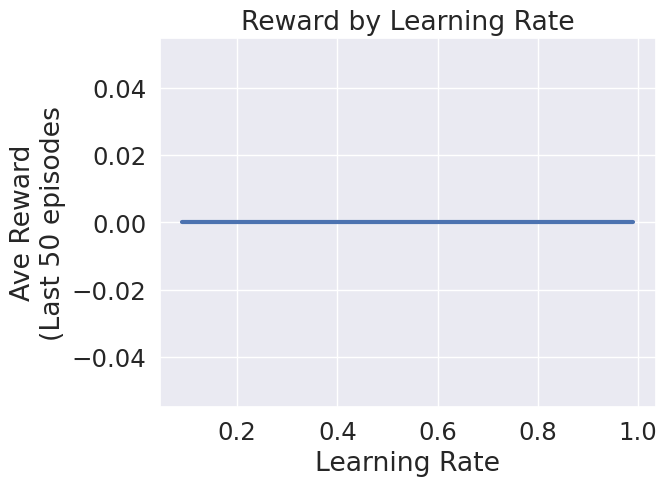

In [39]:
sns.set(font_scale=1.6)

plt.plot(learning_rates, ave_rewards_lr, lw=3, label="Rewards")

plt.xlabel("Learning Rate")
plt.ylabel("Ave Reward\n(Last 50 episodes")

plt.title("Reward by Learning Rate")

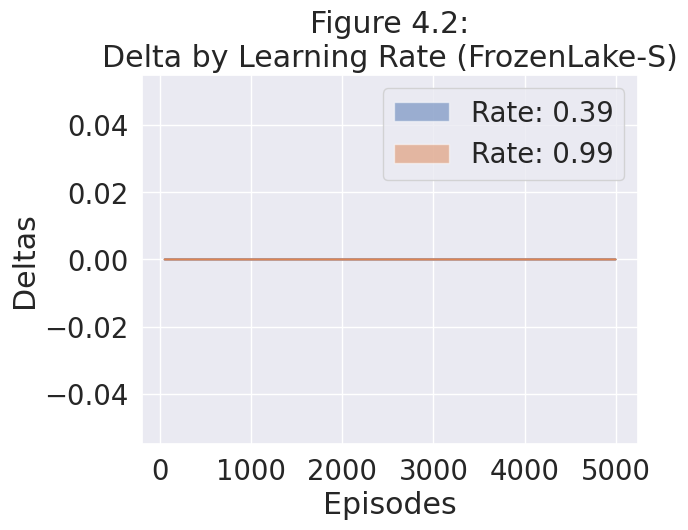

In [64]:
sns.set(font_scale=1.8)
title = "Figure 4.2:\nDelta by Learning Rate (FrozenLake-S)"

for n in [1,3]:
    rates = pd.DataFrame(deltas_lr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_s), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(learning_rates[n],2)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

# ALTER FROZEN LAKE

In [26]:
from contextlib import closing
from io import StringIO
from os import path
from typing import Optional
import pygame
from pygame.constants import SRCALPHA
import numpy as np

from gym import Env, spaces, utils
from gym.envs.toy_text.utils import categorical_sample

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

MAPS = {
    "4x4": ["SFFF", "FHFH", "FFFH", "HFFG"],
    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFFFF",
        "FFFFFFHF",
        "FFHFFFFF",
        "FHFHFFFH",
        "FHHFFFFG",
    ],
}


def generate_random_map(size=8, p=0.8):
    """Generates a random valid map (one that has a path from start to goal)
    :param size: size of each side of the grid
    :param p: probability that a tile is frozen
    """
    valid = False

    # DFS to check that it's a valid path.
    def is_valid(res):
        frontier, discovered = [], set()
        frontier.append((0, 0))
        while frontier:
            r, c = frontier.pop()
            if not (r, c) in discovered:
                discovered.add((r, c))
                directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
                for x, y in directions:
                    r_new = r + x
                    c_new = c + y
                    if r_new < 0 or r_new >= size or c_new < 0 or c_new >= size:
                        continue
                    if res[r_new][c_new] == "G":
                        return True
                    if res[r_new][c_new] != "H":
                        frontier.append((r_new, c_new))
        return False

    while not valid:
        p = min(1, p)
        res = np.random.choice(["F", "H"], (size, size), p=[p, 1 - p])
        res[0][0] = "S"
        res[-1][-1] = "G"
        valid = is_valid(res)
    return ["".join(x) for x in res]


class FrozenLake2Env(Env):
    """
    Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over
    the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.


    ### Action Space
    The agent takes a 1-element vector for actions.
    The action space is `(dir)`, where `dir` decides direction to move in which can be:

    - 0: LEFT
    - 1: DOWN
    - 2: RIGHT
    - 3: UP

    ### Observation Space
    The observation is a value representing the agent's current position as
    current_row * nrows + current_col (where both the row and col start at 0).
    For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.
    The number of possible observations is dependent on the size of the map.
    For example, the 4x4 map has 16 possible observations.

    ### Rewards

    Reward schedule:
    - Reach goal(G): +1
    - Reach hole(H): 0
    - Reach frozen(F): 0

    ### Arguments

    ```
    gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
    ```

    `desc`: Used to specify custom map for frozen lake. For example,

        desc=["SFFF", "FHFH", "FFFH", "HFFG"].

    `map_name`: ID to use any of the preloaded maps.

        "4x4":[
            "SFFF",
            "FHFH",
            "FFFH",
            "HFFG"
            ]

        "8x8": [
            "SFFFFFFF",
            "FFFFFFFF",
            "FFFHFFFF",
            "FFFFFFFF",
            "FFFFFFHF",
            "FFHFFFFF",
            "FHFHFFFH",
            "FHHFFFFG",
        ]

    `is_slippery`: True/False. If True will move in intended direction with
    probability of 1/3 else will move in either perpendicular direction with
    equal probability of 1/3 in both directions.

        For example, if action is left and is_slippery is True, then:
        - P(move left)=1/3
        - P(move up)=1/3
        - P(move down)=1/3

    ### Version History
    * v1: Bug fixes to rewards
    * v0: Initial versions release (1.0.0)
    """

    metadata = {"render_modes": ["human", "ansi", "rgb_array"], "render_fps": 4}

    def __init__(self, desc=None, map_name="4x4", is_slippery=True):
        if desc is None and map_name is None:
            desc = generate_random_map()
        elif desc is None:
            desc = MAPS[map_name]
        self.desc = desc = np.asarray(desc, dtype="c")
        self.nrow, self.ncol = nrow, ncol = desc.shape
        self.reward_range = (-1, 1)

        nA = 4
        nS = nrow * ncol

        self.initial_state_distrib = np.array(desc == b"S").astype("float64").ravel()
        self.initial_state_distrib /= self.initial_state_distrib.sum()

        self.P = {s: {a: [] for a in range(nA)} for s in range(nS)}

        def to_s(row, col):
            return row * ncol + col

        def inc(row, col, a):
            if a == LEFT:
                col = max(col - 1, 0)
            elif a == DOWN:
                row = min(row + 1, nrow - 1)
            elif a == RIGHT:
                col = min(col + 1, ncol - 1)
            elif a == UP:
                row = max(row - 1, 0)
            return (row, col)

        def update_probability_matrix(row, col, action):
            newrow, newcol = inc(row, col, action)
            newstate = to_s(newrow, newcol)
            newletter = desc[newrow, newcol]
            terminated = bytes(newletter) in b"GH"

            # Original
            # reward = float(newletter == b"G")

            # New
            if newletter == b'G': reward = 1.0
            elif newletter == b'H': reward = -1.0
            else: reward = -0.01

            return newstate, reward, terminated

        for row in range(nrow):
            for col in range(ncol):
                s = to_s(row, col)
                for a in range(4):
                    li = self.P[s][a]
                    letter = desc[row, col]
                    if letter in b"GH":
                        li.append((1.0, s, 0, True))
                    else:
                        if is_slippery:
                            for b in [(a - 1) % 4, a, (a + 1) % 4]:
                                li.append(
                                    (1.0 / 3.0, *update_probability_matrix(row, col, b))
                                )
                        else:
                            li.append((1.0, *update_probability_matrix(row, col, a)))

        self.observation_space = spaces.Discrete(nS)
        self.action_space = spaces.Discrete(nA)

        # pygame utils
        self.window_size = (min(64 * ncol, 512), min(64 * nrow, 512))
        self.window_surface = None
        self.clock = None
        self.hole_img = None
        self.cracked_hole_img = None
        self.ice_img = None
        self.elf_images = None
        self.goal_img = None
        self.start_img = None

    def step(self, a):
        transitions = self.P[self.s][a]
        i = categorical_sample([t[0] for t in transitions], self.np_random)
        p, s, r, d = transitions[i]
        self.s = s
        self.lastaction = a
        return (int(s), r, d, {"prob": p})

    def reset(
        self,
        *,
        seed: Optional[int] = None,
        return_info: bool = False,
        options: Optional[dict] = None,
    ):
        super().reset(seed=seed)
        self.s = categorical_sample(self.initial_state_distrib, self.np_random)
        self.lastaction = None

        if not return_info:
            return int(self.s)
        else:
            return int(self.s), {"prob": 1}

    def render(self, mode="human"):
        return self.desc.tolist()
#         desc = self.desc.tolist()
#         if mode == "ansi":
#             return self._render_text(desc)
#         else:
#             return self._render_gui(desc, mode)

    def _render_gui(self, desc, mode):
        if self.window_surface is None:
            pygame.init()
            pygame.display.init()
            pygame.display.set_caption("Frozen Lake")
            if mode == "human":
                self.window_surface = pygame.display.set_mode(self.window_size)
            else:  # rgb_array
                self.window_surface = pygame.Surface(self.window_size)
        if self.clock is None:
            self.clock = pygame.time.Clock()
        if self.hole_img is None:
            file_name = path.join(path.dirname(__file__), "img/hole.png")
            self.hole_img = pygame.image.load(file_name)
        if self.cracked_hole_img is None:
            file_name = path.join(path.dirname(__file__), "img/cracked_hole.png")
            self.cracked_hole_img = pygame.image.load(file_name)
        if self.ice_img is None:
            file_name = path.join(path.dirname(__file__), "img/ice.png")
            self.ice_img = pygame.image.load(file_name)
        if self.goal_img is None:
            file_name = path.join(path.dirname(__file__), "img/goal.png")
            self.goal_img = pygame.image.load(file_name)
        if self.start_img is None:
            file_name = path.join(path.dirname(__file__), "img/stool.png")
            self.start_img = pygame.image.load(file_name)
        if self.elf_images is None:
            elfs = [
                path.join(path.dirname(__file__), "img/elf_left.png"),
                path.join(path.dirname(__file__), "img/elf_down.png"),
                path.join(path.dirname(__file__), "img/elf_right.png"),
                path.join(path.dirname(__file__), "img/elf_up.png"),
            ]
            self.elf_images = [pygame.image.load(f_name) for f_name in elfs]

        board = pygame.Surface(self.window_size, flags=SRCALPHA)
        cell_width = self.window_size[0] // self.ncol
        cell_height = self.window_size[1] // self.nrow
        smaller_cell_scale = 0.6
        small_cell_w = smaller_cell_scale * cell_width
        small_cell_h = smaller_cell_scale * cell_height

        # prepare images
        last_action = self.lastaction if self.lastaction is not None else 1
        elf_img = self.elf_images[last_action]
        elf_scale = min(
            small_cell_w / elf_img.get_width(),
            small_cell_h / elf_img.get_height(),
        )
        elf_dims = (
            elf_img.get_width() * elf_scale,
            elf_img.get_height() * elf_scale,
        )
        elf_img = pygame.transform.scale(elf_img, elf_dims)
        hole_img = pygame.transform.scale(self.hole_img, (cell_width, cell_height))
        cracked_hole_img = pygame.transform.scale(
            self.cracked_hole_img, (cell_width, cell_height)
        )
        ice_img = pygame.transform.scale(self.ice_img, (cell_width, cell_height))
        goal_img = pygame.transform.scale(self.goal_img, (cell_width, cell_height))
        start_img = pygame.transform.scale(self.start_img, (small_cell_w, small_cell_h))

        for y in range(self.nrow):
            for x in range(self.ncol):
                rect = (x * cell_width, y * cell_height, cell_width, cell_height)
                if desc[y][x] == b"H":
                    self.window_surface.blit(hole_img, (rect[0], rect[1]))
                elif desc[y][x] == b"G":
                    self.window_surface.blit(ice_img, (rect[0], rect[1]))
                    goal_rect = self._center_small_rect(rect, goal_img.get_size())
                    self.window_surface.blit(goal_img, goal_rect)
                elif desc[y][x] == b"S":
                    self.window_surface.blit(ice_img, (rect[0], rect[1]))
                    stool_rect = self._center_small_rect(rect, start_img.get_size())
                    self.window_surface.blit(start_img, stool_rect)
                else:
                    self.window_surface.blit(ice_img, (rect[0], rect[1]))

                pygame.draw.rect(board, (180, 200, 230), rect, 1)

        # paint the elf
        bot_row, bot_col = self.s // self.ncol, self.s % self.ncol
        cell_rect = (
            bot_col * cell_width,
            bot_row * cell_height,
            cell_width,
            cell_height,
        )
        if desc[bot_row][bot_col] == b"H":
            self.window_surface.blit(cracked_hole_img, (cell_rect[0], cell_rect[1]))
        else:
            elf_rect = self._center_small_rect(cell_rect, elf_img.get_size())
            self.window_surface.blit(elf_img, elf_rect)

        self.window_surface.blit(board, board.get_rect())
        if mode == "human":
            pygame.event.pump()
            pygame.display.update()
            self.clock.tick(self.metadata["render_fps"])
        else:  # rgb_array
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(self.window_surface)), axes=(1, 0, 2)
            )

    @staticmethod
    def _center_small_rect(big_rect, small_dims):
        offset_w = (big_rect[2] - small_dims[0]) / 2
        offset_h = (big_rect[3] - small_dims[1]) / 2
        return (
            big_rect[0] + offset_w,
            big_rect[1] + offset_h,
        )

    def _render_text(self, desc):
        outfile = StringIO()

        row, col = self.s // self.ncol, self.s % self.ncol
        desc = [[c.decode("utf-8") for c in line] for line in desc]
        desc[row][col] = utils.colorize(desc[row][col], "red", highlight=True)
        if self.lastaction is not None:
            outfile.write(f"  ({['Left', 'Down', 'Right', 'Up'][self.lastaction]})\n")
        else:
            outfile.write("\n")
        outfile.write("\n".join("".join(line) for line in desc) + "\n")

        with closing(outfile):
            return outfile.getvalue()


# Elf and stool from https://franuka.itch.io/rpg-snow-tileset
# All other assets by Mel Sawyer

In [27]:
gym.register(
    id="FrozenLake-v2",
    entry_point=FrozenLake2Env, # optimum = 8.46
    max_episode_steps=300,
)

In [28]:
# env_s_slippery = gym.make('FrozenLake-v1', desc=generate_random_map(size=size_s),is_slippery=True)
env_s_slippery_alt = gym.make('FrozenLake-v2',map_name="8x8",is_slippery=True)
env_s_slippery_alt.reset()

0

In [29]:
env_s_alt_render = env_s_slippery_alt.render()

for r in env_s_alt_render:
    row = ''
    for c in r:
        row += c.decode()
    print(row)

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFFFF
FFFFFFHF
FFHFFFFF
FHFHFFFH
FHHFFFFG


In [30]:
env_s_slippery_alt.reward_range

(-1, 1)

In [31]:
env_s_slippery_alt.reset(seed=8)
n_episodes = 1000
wins, rewards_random = play_episodes(env_s_slippery_alt, n_episodes, None, random = True, rewards_aggrated=False)
print(f'Win Percentage with Random Policy: {wins/n_episodes*100}%')
print(f"Average rewards with Random Policy: {np.mean(rewards_random)}")

Win Percentage with Random Policy: 0.2%
Average rewards with Random Policy: -1.3464500000000004


# VALUE ITERATION (S-Alt)

### By Gamma

In [32]:
vi_deltas_by_gamma = []
gammas = np.arange(0.39,1.0,0.2)

# Randomly Generated Map
for g in gammas:
    env_s_slippery_alt.reset(seed=int(g*1000))
    optimal_function, d_vi = value_iteration(env_s_slippery_alt,discount_factor=g)
    vi_deltas_by_gamma.append(d_vi)
    r = np.mean(optimal_function)
    print(f'Gamma: {g}, Iterations: {len(d_vi)}, Reward: {r}')
    

Gamma: 0.39, Iterations: 6, Reward: -0.03683715794449479
Gamma: 0.5900000000000001, Iterations: 9, Reward: -0.039254818336485905
Gamma: 0.7900000000000001, Iterations: 17, Reward: -0.0439938155750326
Gamma: 0.9900000000000002, Iterations: 149, Reward: 0.08578135168751913


Text(0.5, 1.0, 'Figure 4.2.1.1:\nConvergence by Gamma (FrozenLake-S)')

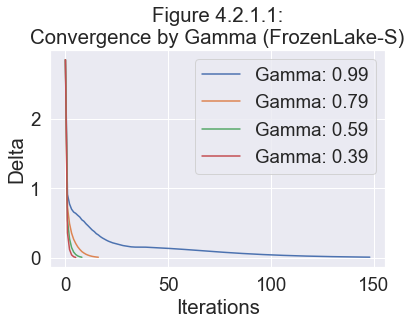

In [33]:
sns.set(font_scale=1.7)
title = "Figure 4.2.1.1:\nConvergence by Gamma (FrozenLake-S)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(vi_deltas_by_gamma[i],label=f'Gamma: {np.round(gammas[i],2)}')

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Delta")
plt.title(title)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

### By Iteration

In [27]:
itr_vi = range(2,202,2)

rewards_vi_gamma = []
run_times_vi_gamma = []
values_funs_vi_gamma = []
policies_vi_gamma = []

for g in gammas:
    rewards_vi=[]
    run_time_vi=[]
    for i in itr_vi:
        s=int(g*1000+i)
        env_s_slippery_alt.reset(seed=s)
        st_time = time.perf_counter()
        V, d_vi = value_iteration(env_s_slippery_alt.env, discount_factor = g, max_iteration = i)
        run_time_vi.append(time.perf_counter() - st_time)
        
        env_s_slippery_alt.reset(seed=s)
        opt_policy_vi = extract_policy(V, env_s_slippery_alt,gamma=g)
        wins, total_reward, avg_reward = play_episodes(env_s_slippery_alt, 10, opt_policy_vi, random = False)
        rewards_vi.append(avg_reward)
    values_funs_vi_gamma.append(V)
    policies_vi_gamma.append(opt_policy_vi)
    rewards_vi_gamma.append(rewards_vi)
    run_times_vi_gamma.append(run_time_vi)
    print(f'Gamma: {g}, Reward: {rewards_vi[-1]}, Win %: {wins/10*100}, Run-time: {np.sum(run_time_vi)}')

Gamma: 0.39, Reward: -3.000000000000189, Win %: 0.0, Run-time: 0.48151824400019905
Gamma: 0.5900000000000001, Reward: -0.6209999999999766, Win %: 100.0, Run-time: 0.6877013600019382
Gamma: 0.7900000000000001, Reward: -0.189999999999994, Win %: 100.0, Run-time: 1.2948819840003125
Gamma: 0.9900000000000002, Reward: 0.2070000000000011, Win %: 100.0, Run-time: 7.294873258000507


In [28]:
np.array(rewards_vi_gamma).mean(axis=1)

array([-3.     , -0.91595, -0.01029,  0.01975])

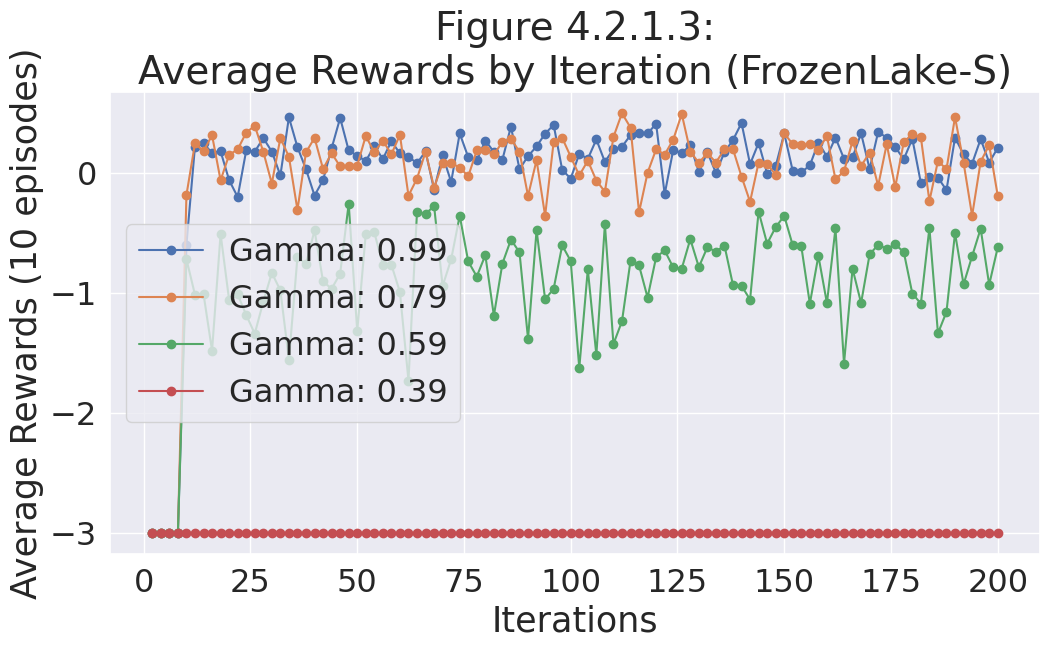

In [29]:
sns.set(font_scale=2.1)
title = "Figure 4.2.1.3:\nAverage Rewards by Iteration (FrozenLake-S)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,rewards_vi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Average Rewards (10 episodes)')
plt.title(title,size=28)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

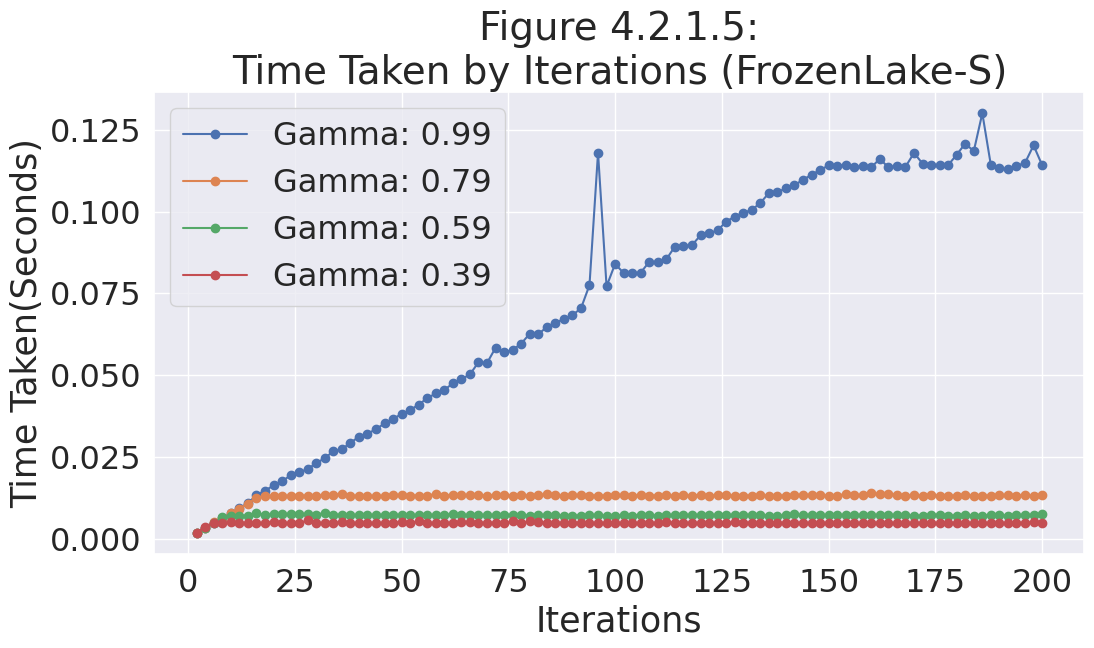

In [76]:
sns.set(font_scale=2.1)
title = "Figure 4.2.1.5:\nTime Taken by Iterations (FrozenLake-S)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,run_times_vi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Time Taken(Seconds)')
plt.title(title,size=28)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [34]:
## env_s_slippery.reset()
V_vi = None
times_vi = []
for _ in range(5):
    s_time = time.perf_counter()
    V_vi,_ = value_iteration(env_s_slippery_alt,discount_factor=0.99)
    times_vi.append(time.perf_counter() - s_time)
    
policy_vi_s = extract_policy(V_vi, env_s_slippery_alt)


In [35]:
env_s_slippery_alt.reset(seed=88)

n_episodes = 1000
wins, rewards_vi = play_episodes(env_s_slippery_alt, n_episodes, policy_vi_s, random = False,rewards_aggrated=False)
print(f'Win Percentage with Value Iteration: {wins/n_episodes*100}%')
print(f"Average rewards with Value Iteration: {np.mean(rewards_vi)}")
print(f"Average times with Value Iteration: {np.mean(times_vi)}")

Win Percentage with Value Iteration: 99.6%
Average rewards with Value Iteration: 0.16547999999999977
Average times with Value Iteration: 0.16394283999999287


## POLICY ITERATION (S-Alt)

### By Gamma

In [32]:
#Calling Functions to get the optimum policy
np.random.seed(8)

pi_deltas_by_gamma = []
pi_iterations_by_gamma = []
pi_ave_reward_by_gamma = []
pi_times_by_gamma = []
pi_evals_by_gamma = []

# Randomly Generated Map
for g in gammas:
    env_s_slippery_alt.reset(seed=int(g*1000))
    st_time = time.perf_counter()
    V, _, d_pi = policy_iteration(env_s_slippery_alt,discount_factor=g, early_stopping=True)
    pi_times_by_gamma.append(time.perf_counter()-st_time)
    pi_iterations_by_gamma.append(len(d_pi))
    pi_deltas_by_gamma.append(d_pi)
    r = np.mean(V)
    pi_ave_reward_by_gamma.append(r)
    print(f'Gamma: {g}, Iterations: {len(d_pi)}, Reward: {r}')

Gamma: 0.39, Iterations: 26, Reward: -0.03684603767095795
Gamma: 0.5900000000000001, Iterations: 46, Reward: -0.039275463124436485
Gamma: 0.7900000000000001, Iterations: 101, Reward: -0.04390467414833132
Gamma: 0.9900000000000002, Iterations: 31, Reward: -0.04532970469652208


Text(0.5, 1.0, 'Figure 4.2.2.1:\nConvergence by Gamma (FrozenLake-S)')

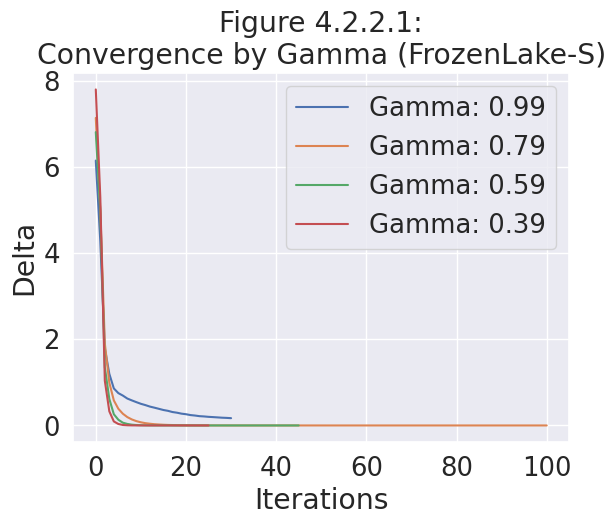

In [33]:
sns.set(font_scale=1.7)
title = "Figure 4.2.2.1:\nConvergence by Gamma (FrozenLake-S)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(pi_deltas_by_gamma[i],label=f'Gamma: {np.round(gammas[i],2)}')

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Delta")
plt.title(title)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

### By Iterations

In [45]:
# itr_pi = range(35)

rewards_pi_gamma = []
run_times_pi_gamma = []
values_funs_pi_gamma = []
policies_pi_gamma = []

for g in gammas:
    rewards_pi=[]
    run_time_pi=[]
    for i in itr_vi:
        s = int(g*1000+i)
        env_s_slippery_alt.reset(seed=s)
        st_time = time.perf_counter()
        V, opt_policy_pi, _ = policy_iteration(env_s_slippery_alt,discount_factor=g, max_iteration = i,early_stopping=True)
        run_time_pi.append(time.perf_counter() - st_time)
        
        env_s_slippery.reset(seed=s)
        wins, total_reward, avg_reward = play_episodes(env_s_slippery_alt, 10, opt_policy_pi, random = False)
        rewards_pi.append(avg_reward)
    values_funs_pi_gamma.append(V)
    policies_pi_gamma.append(opt_policy_pi)
    rewards_pi_gamma.append(rewards_pi)
    run_times_pi_gamma.append(run_time_pi)
    print(f'Gamma: {g}, Reward: {rewards_pi[-1]}, Run-time: {np.sum(run_time_pi)}')

Gamma: 0.39, Reward: 0.25100000000000755, Run-time: 4.242331313002978
Gamma: 0.5900000000000001, Reward: -0.10899999999999639, Run-time: 5.129211368000142
Gamma: 0.7900000000000001, Reward: -0.24999999999999273, Run-time: 5.904352160999224
Gamma: 0.9900000000000002, Reward: 0.37600000000000305, Run-time: 6.2585935460001565


In [46]:
np.array(rewards_pi_gamma).mean(axis=1)

array([-0.04591, -0.06867, -0.00102,  0.04388])

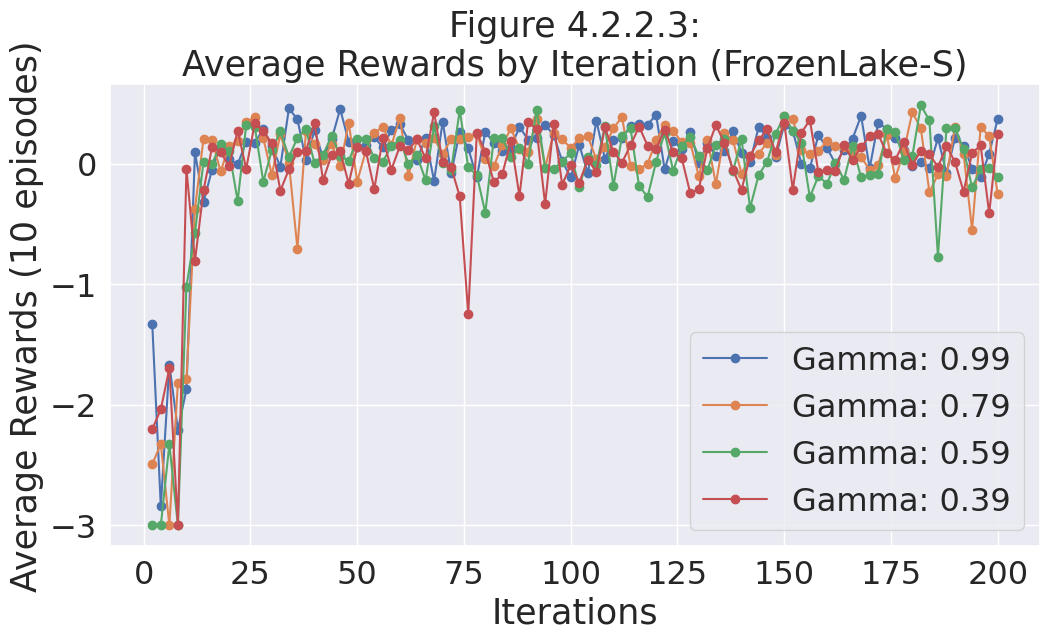

In [47]:
sns.set(font_scale=2.1)
title = "Figure 4.2.2.3:\nAverage Rewards by Iteration (FrozenLake-S)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,rewards_pi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Average Rewards (10 episodes)')
plt.title(title)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

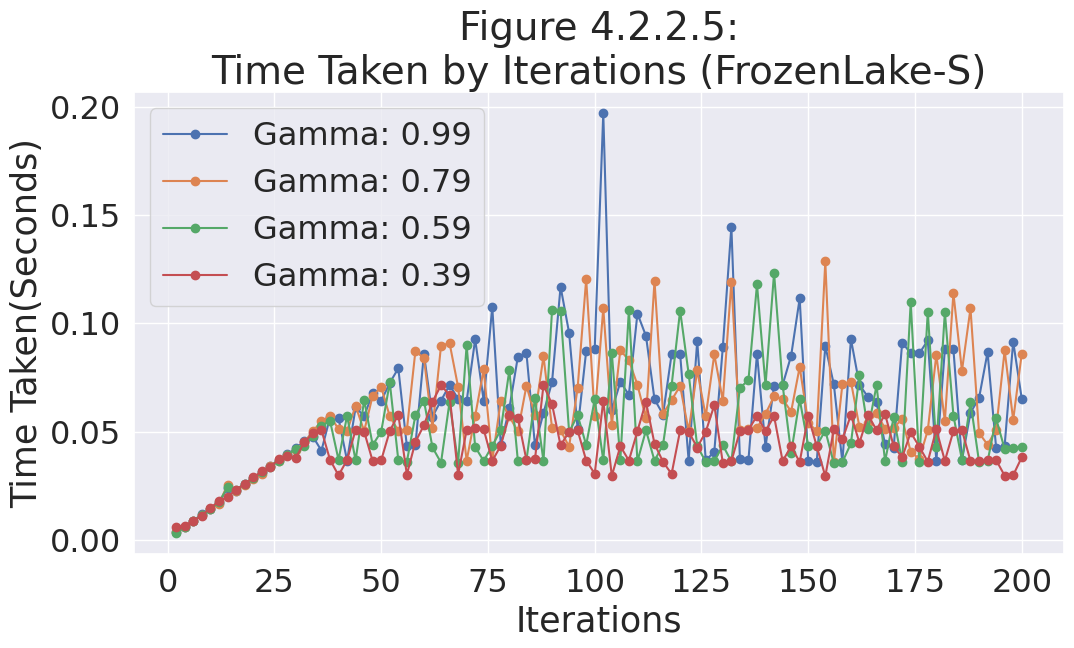

In [48]:
sns.set(font_scale=2.1)
title = "Figure 4.2.2.5:\nTime Taken by Iterations (FrozenLake-S)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,run_times_pi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Time Taken(Seconds)')
plt.title(title,size=28)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [36]:
env_s_slippery_alt.reset(seed=88)
V_pi = None
times_pi = []
for _ in range(5):
    s_time = time.perf_counter()
    V_pi, policy_pi, _ = policy_iteration(env_s_slippery_alt,discount_factor=0.99,early_stopping=True)
    times_pi.append(time.perf_counter() - s_time)
    
policy_pi_s = extract_policy(V_pi, env_s_slippery_alt)


In [37]:
env_s_slippery_alt.reset(seed=88)

n_episodes = 1000
wins, rewards_pi = play_episodes(env_s_slippery_alt, n_episodes, policy_pi_s, random = False,rewards_aggrated=False)
print(f'Win Percentage with Policy Iteration: {wins/n_episodes*100}%')
print(f"Average rewards with Policy Iteration: {np.mean(rewards_pi)}")
print(f"Average times with Policy Iteration: {np.mean(times_pi)}")

Win Percentage with Policy Iteration: 99.5%
Average rewards with Policy Iteration: 0.11493999999999997
Average times with Policy Iteration: 0.08205190000001039


# Q-LEARNING (S-Alt)

In [56]:
train_episodes_s = 5000

learning_rates = np.arange(0.09,1.0,0.4)
# learning_rates = [0.29,0.39]
ave_rewards_lr = []
rewards_lr = []
# q_tables_lr = []
times_lr = []
deltas_lr = []
for learning_rate in learning_rates:
    reward, t, _, deltas = q_learning(env_s_slippery_alt, discount_factor=0.25, decay_learning_rate=0, init_learning_rate = learning_rate, train_episodes=train_episodes_s, early_stopping=False)
    deltas_lr.append(deltas)
    rewards_lr.append(reward)
    ave_rewards_lr.append(np.mean(reward[-50:]))
#     q_tables_lr.append(q)
#     times_lr.append(np.sum(t))
    times_lr.append(len(t))
    print(f"{learning_rate}: {np.mean(reward[-50:])}")

0.09: -0.1964000000000004
0.49: -0.3528000000000005
0.89: -1.0000000000000007


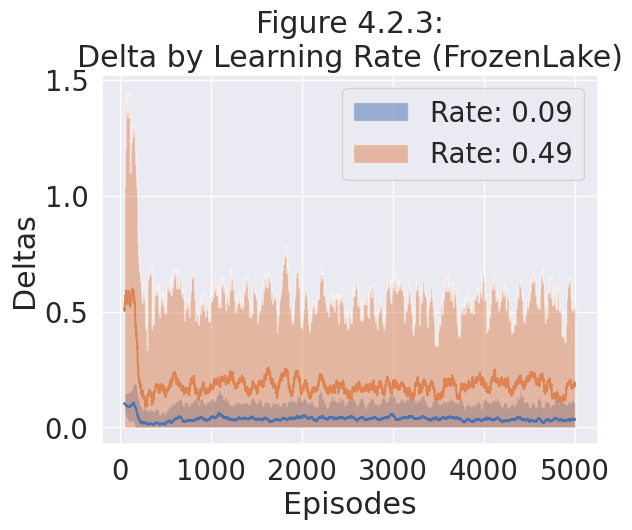

In [58]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3:\nDelta by Learning Rate (FrozenLake)"

for n in [0,1]:
    rates = pd.DataFrame(deltas_lr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_s), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(learning_rates[n],2)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [59]:
train_episodes_s = 5000

learning_rates = np.arange(0.09,1.0,0.1)
# learning_rates = [0.29,0.39]
ave_rewards_lr = []
rewards_lr = []
# q_tables_lr = []
times_lr = []
deltas_lr = []
for learning_rate in learning_rates:
    reward, t, _, deltas = q_learning(env_s_slippery_alt, discount_factor=0.25, init_learning_rate = learning_rate, train_episodes=train_episodes_s, early_stopping=False)
    deltas_lr.append(deltas)
    rewards_lr.append(reward)
    ave_rewards_lr.append(np.mean(reward[-50:]))
#     q_tables_lr.append(q)
#     times_lr.append(np.sum(t))
    times_lr.append(len(t))
    print(f"{learning_rate}: {np.mean(reward[-50:])}")

0.09: -0.38300000000000045
0.19: -0.20000000000000046
0.29000000000000004: -0.22840000000000046
0.39: -0.34900000000000053
0.49: -0.36260000000000053
0.59: -0.41580000000000056
0.6900000000000001: -0.2370000000000005
0.79: -0.5726000000000007
0.89: -0.2590000000000005
0.99: -0.34880000000000044


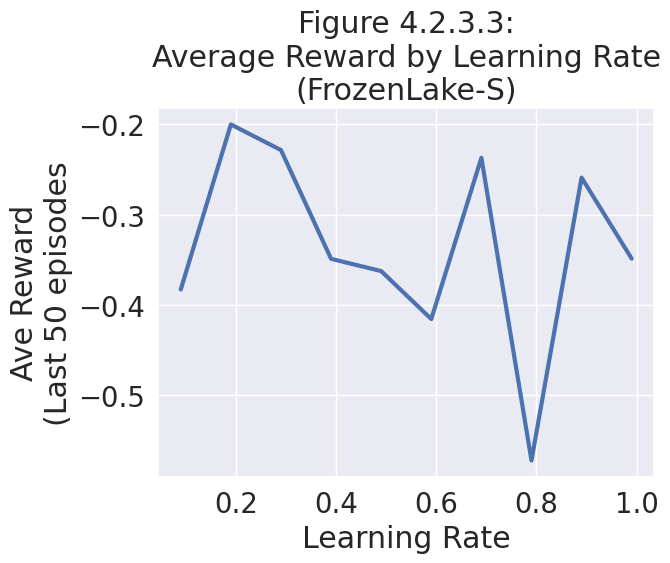

In [64]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.3:\nAverage Reward by Learning Rate\n(FrozenLake-S)"

plt.plot(learning_rates, ave_rewards_lr, lw=3, label="Rewards")

plt.xlabel("Learning Rate")
plt.ylabel("Ave Reward\n(Last 50 episodes")

plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

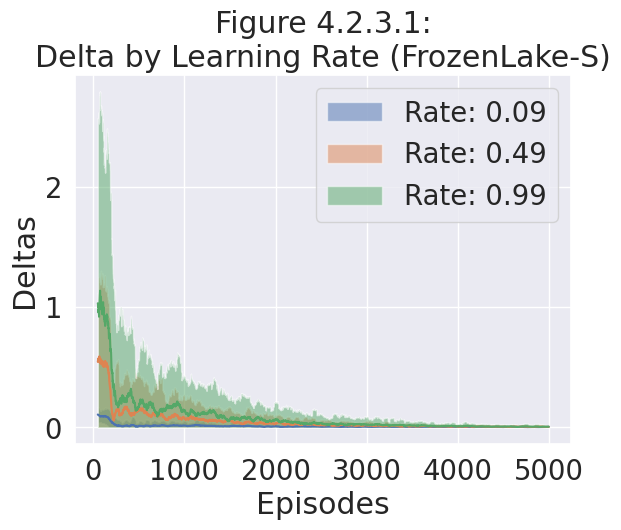

In [63]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.1:\nDelta by Learning Rate (FrozenLake-S)"

for n in [0,4,9]:
    rates = pd.DataFrame(deltas_lr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_s), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(learning_rates[n],2)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [70]:
discount_rates = np.arange(0.05,0.96,0.05)
# discount_rates = np.arange(0.05,0.96,0.30)
ave_rewards_dr = []
rewards_dr = []
deltas_dr = []
q_tables_dr = []
times_dr = []
for d in discount_rates:
    reward, t, q, deltas = q_learning(env_s_slippery_alt, discount_factor = d, train_episodes=train_episodes_s,early_stopping=False)
    ave_rewards_dr.append(np.mean(reward[-50:]))
    rewards_dr.append(reward)
    deltas_dr.append(deltas)
    q_tables_dr.append(q)
#     times_dr.append(np.mean(t))
    times_dr.append(len(t))
    print(f"{d}: {np.mean(reward[-50:])}")

0.05: -0.6884000000000006
0.1: -0.33600000000000046
0.15000000000000002: -0.2974000000000005
0.2: -0.03760000000000043
0.25: -0.3384000000000005
0.3: -0.44500000000000056
0.35000000000000003: -0.19300000000000042
0.4: -0.22760000000000052
0.45: -0.3680000000000005
0.5: -0.3060000000000005
0.55: -0.17120000000000046
0.6000000000000001: -0.38940000000000047
0.6500000000000001: -0.2278000000000005
0.7000000000000001: -0.2848000000000005
0.7500000000000001: -0.16280000000000047
0.8: -0.3308000000000005
0.8500000000000001: -0.11220000000000041
0.9000000000000001: -0.2064000000000005
0.9500000000000001: -0.1664000000000005


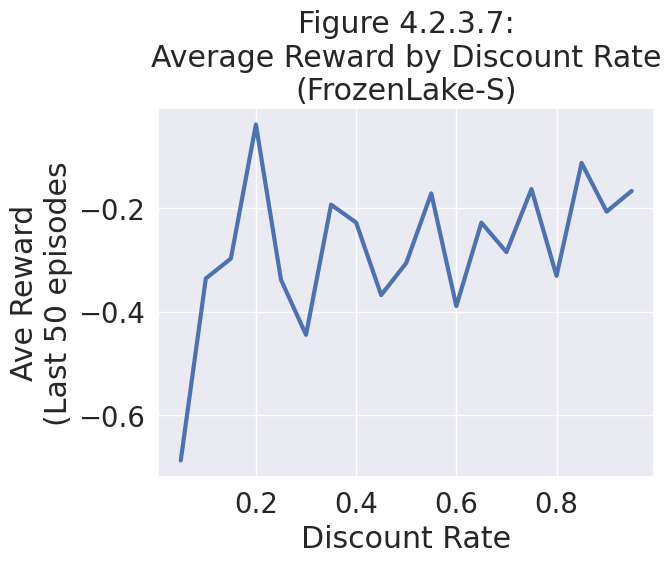

In [72]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.7:\nAverage Reward by Discount Rate\n(FrozenLake-S)"

plt.plot(discount_rates, ave_rewards_dr, lw=3, label="Rewards")

plt.xlabel("Discount Rate")
plt.ylabel("Ave Reward\n(Last 50 episodes")

plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

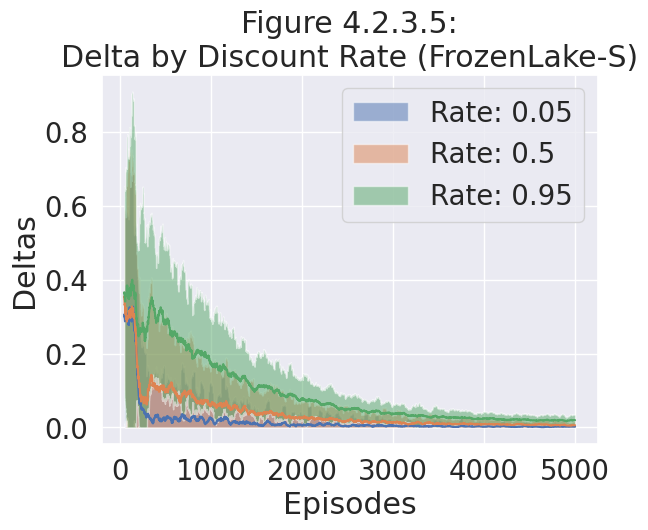

In [73]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.5:\nDelta by Discount Rate (FrozenLake-S)"

for n in [0,9,18]:
    rates = pd.DataFrame(deltas_dr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_s), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(discount_rates[n],2)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [93]:
# exploration_decay_rates = np.arange(0,0.1001,0.005)
exploration_decay_rates = np.arange(0.00158,0.102,0.01)
ave_rewards_edr = []
deltas_edr = []
q_tables_edr = []
times_edr = []
env_s_slippery_alt.reset(seed=8)
for d in exploration_decay_rates:
    reward, t, q, deltas = q_learning(env_s_slippery_alt, decay = d, train_episodes=train_episodes_s, early_stopping=False)
    ave_rewards_edr.append(np.mean(reward[-50:]))
    deltas_edr.append(deltas)
    q_tables_edr.append(q)
#     times_edr.append(np.mean(t))
    times_edr.append(len(t))
    print(f"{d}: {np.mean(reward[-50:])}")

0.00158: 0.00939999999999956
0.01158: -0.24280000000000046
0.021580000000000002: -0.25080000000000047
0.03158: -0.2278000000000005
0.04158: -0.18300000000000044
0.05158: -0.3242000000000005
0.061579999999999996: -0.3916000000000006
0.07158: -0.13420000000000043
0.08158: -0.2722000000000005
0.09158: -0.37800000000000056
0.10158: -0.24860000000000046


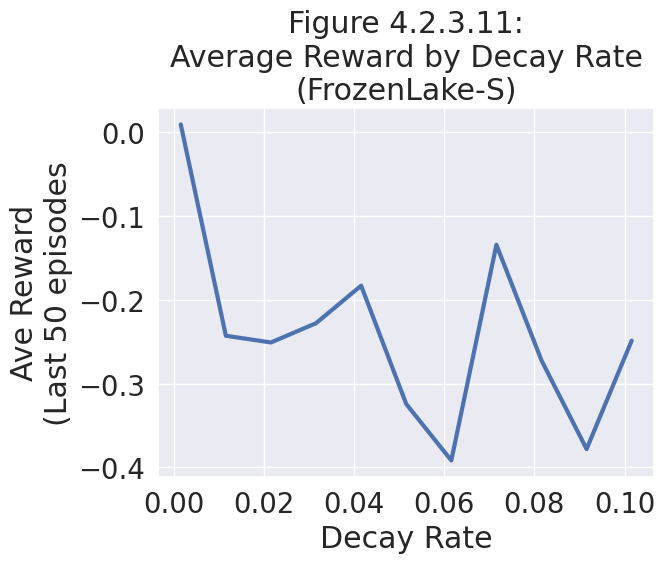

In [95]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.11:\nAverage Reward by Decay Rate\n(FrozenLake-S)"

plt.plot(exploration_decay_rates, ave_rewards_edr, lw=3, label="Rewards")

plt.xlabel("Decay Rate")
plt.ylabel("Ave Reward\n(Last 50 episodes")

plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

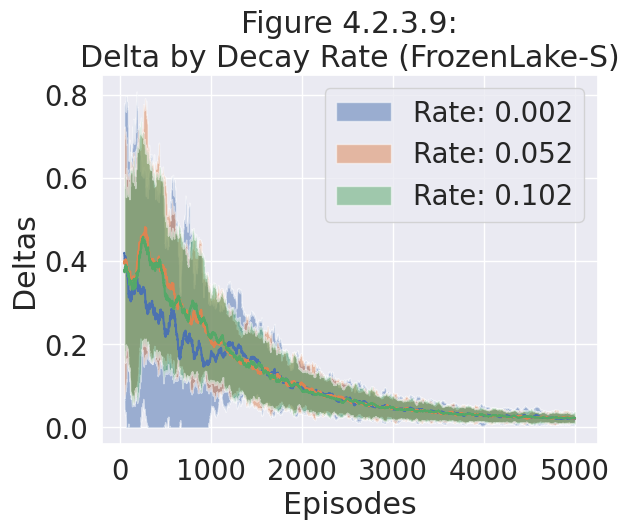

In [87]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.9:\nDelta by Decay Rate (FrozenLake-S)"

for n in [0,5,10]:
    rates = pd.DataFrame(deltas_edr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_s), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(exploration_decay_rates[n],3)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [41]:
env_s_slippery_alt.reset(seed=88)
V_ql = None
times_ql = []
for _ in range(5):
    s_time = time.perf_counter()
    _,_,_,_ = q_learning(env_s_slippery_alt, init_learning_rate=0.3, discount_factor=0.99,train_episodes=6000, decay=0.01, early_stopping=True)
    times_ql.append(time.perf_counter() - s_time)

In [38]:
env_s_slippery_alt.reset(seed=8)

_,_,Q,_ = q_learning(env_s_slippery_alt, init_learning_rate=0.3, discount_factor=0.99,train_episodes=6000, decay=0.01, early_stopping=False)

policy_ql_s = np.argmax(Q,axis=1)

n_episodes = 1000
wins, rewards_ql = play_episodes(env_s_slippery_alt, n_episodes, policy_ql_s, random = False,rewards_aggrated=False)
print(f'Win Percentage with Q-Learning: {wins/n_episodes*100}%')
print(f"Average rewards with Q-Learning: {np.mean(rewards_ql)}")
print(f"Average times with Q-Learning: {np.mean(times_ql)}")

Win Percentage with Q-Learning: 95.39999999999999%
Average rewards with Q-Learning: -0.2189599999999989


NameError: name 'times_ql' is not defined

=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

# Large Enviroment

# RANDOM ACTIONS (LG-Alt)

In [39]:
np.random.seed(9)

In [40]:
size_lg = 20

In [41]:
env_lg_slippery_alt = gym.make('FrozenLake-v2', desc=generate_random_map(size=size_lg,p=.9),is_slippery=True)
env_lg_slippery_alt.reset()

0

This is play until you win!

In [42]:
env_lg_slippery_alt.observation_space.n

400

In [43]:
env_lg_alt_render = env_lg_slippery_alt.render()

for r in env_lg_alt_render:
    row = ''
    for c in r:
        row += c.decode()
    print(row)

SFFFFFFFFFFFHFFFFFFF
FFFFHFHFFHFFHFFFHFFF
FFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFFFFFFFFF
FFFHFFFFFFFFFFFFFFFF
FFHFFFFFFFFFFHFHFFFF
FFFFFFFHFHFFFFFFFFFF
FFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFF
FFFFHFFFFHFFFFFFFHFF
FFFFFFFFFFHFFFFFFFFF
FFFFFFFFFFFFHFFHFFFF
FFFFFFHFFFFFFFFFFFFH
FFFFFFFFFFFFFFFHFHFF
FFFFFFFFFFFFFFFFFFHF
FFFFFFFFFHFFFFFFFFFF
FFHFFFFFFFFFFFFFFFFF
FFHFFFFHFFFHFFFFHFFF
FFHFFFFFFFFFFFFFHFFF
FFFFFFFFHFFFFFFFFFHG


In [81]:
# runs_lg_wins_only = []
# for i in range(100):
#     state = env_lg_slippery_alt.reset()
#     counter = 0
#     reward = None
#     rewards = 0
# #     print(i)
#     while reward != 1 and counter < 50000:
#         state, reward, done, info = env_lg_slippery_alt.step(env_lg_slippery_alt.action_space.sample())
#         rewards += reward
#         counter += 1

#     runs_lg_wins_only.append(rewards)

In [82]:
# sns.set(font_scale=1.0)
# plt.hist(runs_lg_wins_only,bins=20,alpha=1.0,label="2500 states")
# # plt.hist(runs_s_wins_only, bins=5, alpha=0.5,label="500 states")
# plt.xticks(rotation=90)
# plt.xlabel("Total Rewards")
# # plt.legend()
# plt.title("Rewards (Play until a Win)")
# plt.show()

This is play until the game is DONE. Env can terminate (around 800 episodes)

In [83]:
# runs_lg_done = []
# wins_lg=0
# for _ in range(1000):
#     state = env_lg_slippery_alt.reset()
#     counter = 0
#     reward = None
#     done = False
#     while reward != 1 and not done:
#         state, reward, done, info = env_lg_slippery_alt.step(env_lg_slippery_alt.action_space.sample())
#         counter += reward
#         wins_lg += reward == 1

#     runs_lg_done.append(counter)

In [84]:
# sns.set(font_scale=1.0)
# plt.hist(runs_lg_done,bins=20)
# # plt.hist(runs_s_done,bins=20)
# plt.xticks(rotation=90)
# plt.xlabel("Total Rewards")
# plt.title("Rewards (Play until a Win)")
# plt.show()

In [44]:
env_lg_slippery_alt.reset()
n_episodes = 1000
wins, rewards_random = play_episodes(env_lg_slippery_alt, n_episodes, None, random = True, rewards_aggrated=False)
print(f'Win Percentage with Random Policy: {wins/n_episodes*100}%')
print(f"Average rewards with Random Policy: {np.mean(rewards_random)}")

Win Percentage with Random Policy: 0.0%
Average rewards with Random Policy: -1.3293499999999998


# VALUE ITERATION (LG)

### By Gamma

In [86]:
vi_deltas_by_gamma = []

# Randomly Generated Map
for g in gammas:
    env_lg_slippery_alt.reset(seed=int(g*1000))
    optimal_function, d_vi = value_iteration(env_lg_slippery_alt,discount_factor=g)
    vi_deltas_by_gamma.append(d_vi)
    r = np.mean(optimal_function)
    print(f'Gamma: {g}, Iterations: {len(d_vi)}, Reward: {r}')
    

Gamma: 0.39, Iterations: 8, Reward: -0.027997671598999768
Gamma: 0.5900000000000001, Iterations: 13, Reward: -0.03563301853331881
Gamma: 0.7900000000000001, Iterations: 26, Reward: -0.05576687569704026
Gamma: 0.9900000000000002, Iterations: 262, Reward: -0.33240201472771025


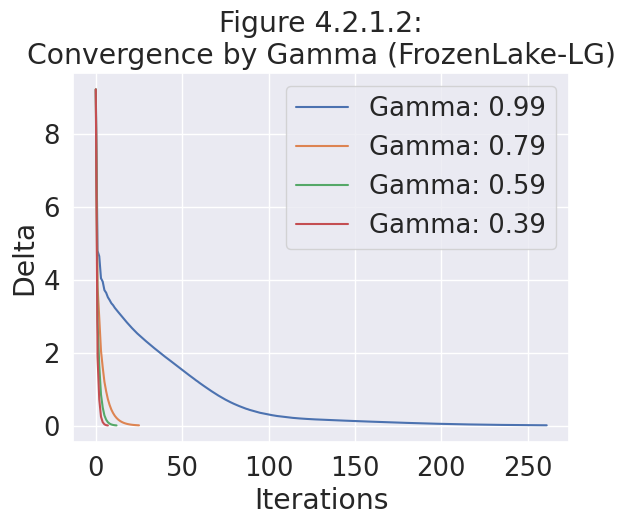

In [87]:
sns.set(font_scale=1.7)
title = "Figure 4.2.1.2:\nConvergence by Gamma (FrozenLake-LG)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(vi_deltas_by_gamma[i],label=f'Gamma: {np.round(gammas[i],2)}')

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Delta")
plt.title(title)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

### By Iteration

In [88]:
itr_vi = range(2,202,2)

rewards_vi_gamma = []
run_times_vi_gamma = []
values_funs_vi_gamma = []
policies_vi_gamma = []

for g in gammas:
    rewards_vi=[]
    run_time_vi=[]
    for i in itr_vi:
        s = int(g*1000+i)
        env_lg_slippery_alt.reset(seed=s)
        st_time = time.perf_counter()
        V, d_vi = value_iteration(env_lg_slippery_alt.env, discount_factor = g, max_iteration = i)
        run_time_vi.append(time.perf_counter() - st_time)
        
        env_lg_slippery_alt.reset(seed=s)
        opt_policy_vi = extract_policy(V, env_lg_slippery_alt,gamma=g)
        wins, total_reward, avg_reward = play_episodes(env_lg_slippery_alt, 10, opt_policy_vi, random = False)
        rewards_vi.append(avg_reward)
    values_funs_vi_gamma.append(V)
    policies_vi_gamma.append(opt_policy_vi)
    rewards_vi_gamma.append(rewards_vi)
    run_times_vi_gamma.append(run_time_vi)
    print(f'Gamma: {g}, Reward: {rewards_vi[-1]}, Win %: {wins/10*100}, Run-time: {np.sum(run_time_vi)}')

Gamma: 0.39, Reward: -3.000000000000189, Win %: 0.0, Run-time: 4.099651953996727
Gamma: 0.5900000000000001, Reward: -3.000000000000189, Win %: 0.0, Run-time: 6.515027286004624
Gamma: 0.7900000000000001, Reward: -2.1320000000000836, Win %: 40.0, Run-time: 12.735370581993266
Gamma: 0.9900000000000002, Reward: -0.9509999999999696, Win %: 90.0, Run-time: 51.97297719699691


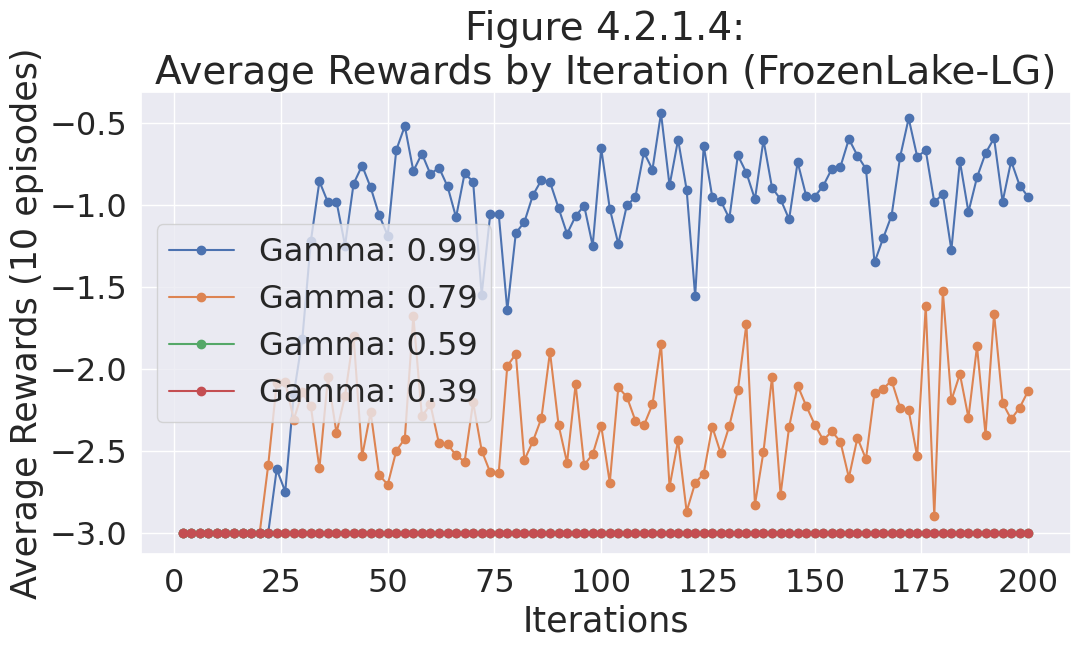

In [90]:
sns.set(font_scale=2.1)
title = "Figure 4.2.1.4:\nAverage Rewards by Iteration (FrozenLake-LG)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,rewards_vi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Average Rewards (10 episodes)')
plt.title(title,size=28)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

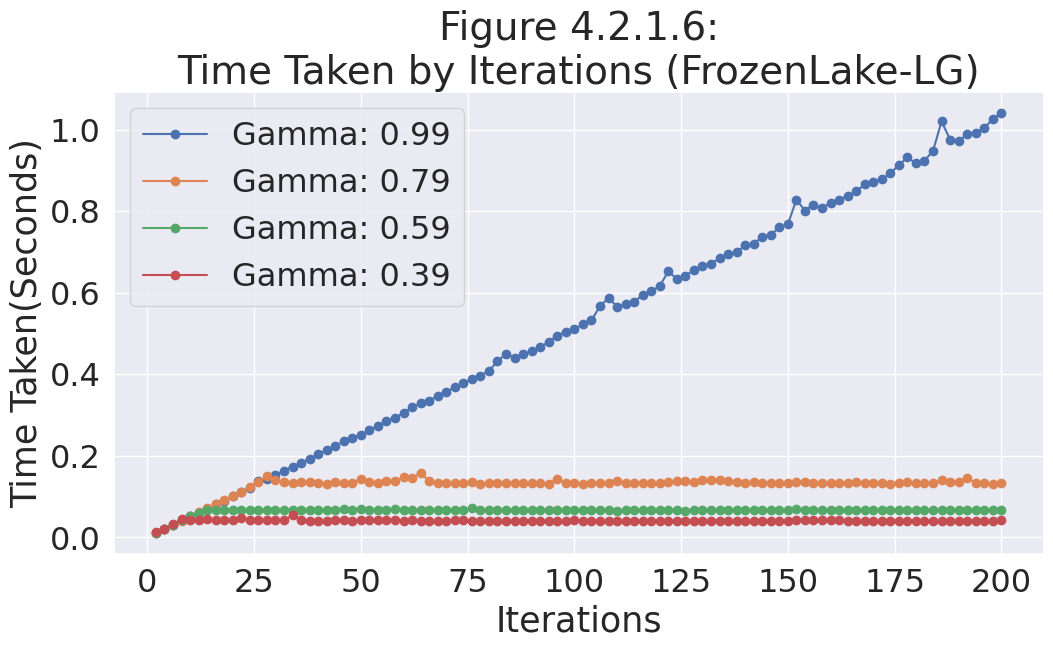

In [91]:
sns.set(font_scale=2.1)
title = "Figure 4.2.1.6:\nTime Taken by Iterations (FrozenLake-LG)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,run_times_vi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Time Taken(Seconds)')
plt.title(title,size=28)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [45]:
env_lg_slippery_alt.reset(seed=8)
V_vi = None
times_vi = []
for _ in range(5):
    s_time = time.perf_counter()
    V_vi,test = value_iteration(env_lg_slippery_alt,discount_factor=0.99)
    times_vi.append(time.perf_counter() - s_time)
    
policy_vi_lg = extract_policy(V_vi, env_lg_slippery_alt)


In [46]:
env_lg_slippery_alt.reset(seed=8)

n_episodes = 1000
wins, rewards_vi = play_episodes(env_lg_slippery_alt, n_episodes, policy_vi_lg, random = False,rewards_aggrated=False)
print(f'Win Percentage with Value Iteration: {wins/n_episodes*100}%')
print(f"Average rewards with Value Iteration: {np.mean(rewards_vi)}")
print(f"Average times with Value Iteration: {np.mean(times_vi)}")

Win Percentage with Value Iteration: 93.30000000000001%
Average rewards with Value Iteration: -0.8931599999999983
Average times with Value Iteration: 1.865009040000018


## POLICY ITERATION (LG)

### By Gamma

In [94]:
#Calling Functions to get the optimum policy
np.random.seed(8)

pi_deltas_by_gamma = []
pi_iterations_by_gamma = []
pi_ave_reward_by_gamma = []
pi_times_by_gamma = []
pi_evals_by_gamma = []

# Randomly Generated Map
for g in gammas:
    env_lg_slippery_alt.reset()
    st_time = time.perf_counter()
    V, _, d_pi = policy_iteration(env_lg_slippery_alt,discount_factor=g,early_stopping=True)
    pi_times_by_gamma.append(time.perf_counter()-st_time)
    pi_iterations_by_gamma.append(len(d_pi))
    pi_deltas_by_gamma.append(d_pi)
    r = np.mean(V)
    pi_ave_reward_by_gamma.append(r)
    print(f'Gamma: {g}, Iterations: {len(d_pi)}, Reward: {r}')

Gamma: 0.39, Iterations: 46, Reward: -0.02800456180212433
Gamma: 0.5900000000000001, Iterations: 71, Reward: -0.035652156764933586
Gamma: 0.7900000000000001, Iterations: 156, Reward: -0.05583716344360704
Gamma: 0.9900000000000002, Iterations: 300, Reward: -0.3318579321344211


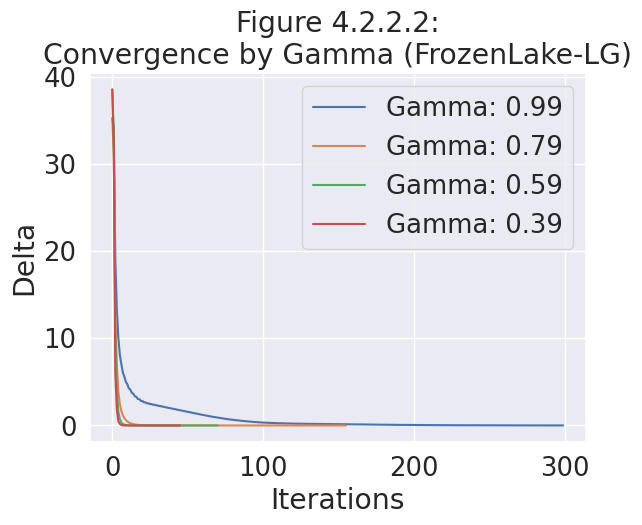

In [96]:
sns.set(font_scale=1.7)
title = "Figure 4.2.2.2:\nConvergence by Gamma (FrozenLake-LG)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(pi_deltas_by_gamma[i],label=f'Gamma: {np.round(gammas[i],2)}')

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Delta")
plt.title(title)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

### By Iterations

In [97]:
# itr_pi = range(35)

rewards_pi_gamma = []
run_times_pi_gamma = []
values_funs_pi_gamma = []
policies_pi_gamma = []

for g in gammas:
    rewards_pi=[]
    run_time_pi=[]
    for i in itr_vi:
        s = int(g*1000+i)
        env_lg_slippery_alt.reset(seed=s)
        st_time = time.perf_counter()
        V, opt_policy_pi, _ = policy_iteration(env_lg_slippery_alt,discount_factor=g, max_iteration = i)
        run_time_pi.append(time.perf_counter() - st_time)
        
        env_lg_slippery_alt.reset(seed=s)
        wins, total_reward, avg_reward = play_episodes(env_lg_slippery_alt, 10, opt_policy_pi, random = False)
        rewards_pi.append(avg_reward)
    values_funs_pi_gamma.append(V)
    policies_pi_gamma.append(opt_policy_pi)
    rewards_pi_gamma.append(rewards_pi)
    run_times_pi_gamma.append(run_time_pi)
    print(f'Gamma: {g}, Reward: {rewards_pi[-1]}, Run-time: {np.sum(run_time_pi)}')

Gamma: 0.39, Reward: -2.8590000000001647, Run-time: 42.17569457800164
Gamma: 0.5900000000000001, Reward: -1.441999999999961, Run-time: 60.321521218998896
Gamma: 0.7900000000000001, Reward: -0.994999999999967, Run-time: 88.49850254100056
Gamma: 0.9900000000000002, Reward: -0.9639999999999672, Run-time: 101.41215600999931


In [99]:
np.mean(rewards_pi_gamma,axis=1)

array([-2.5177 , -1.55156, -1.52923, -1.31494])

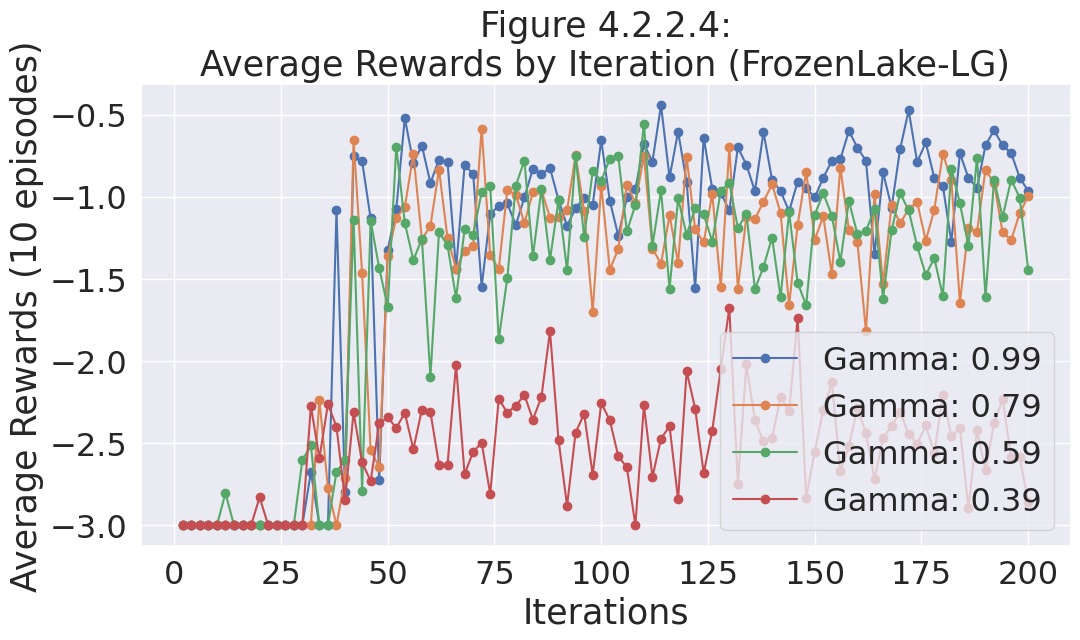

In [98]:
sns.set(font_scale=2.1)
title = "Figure 4.2.2.4:\nAverage Rewards by Iteration (FrozenLake-LG)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,rewards_pi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Average Rewards (10 episodes)')
plt.title(title)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

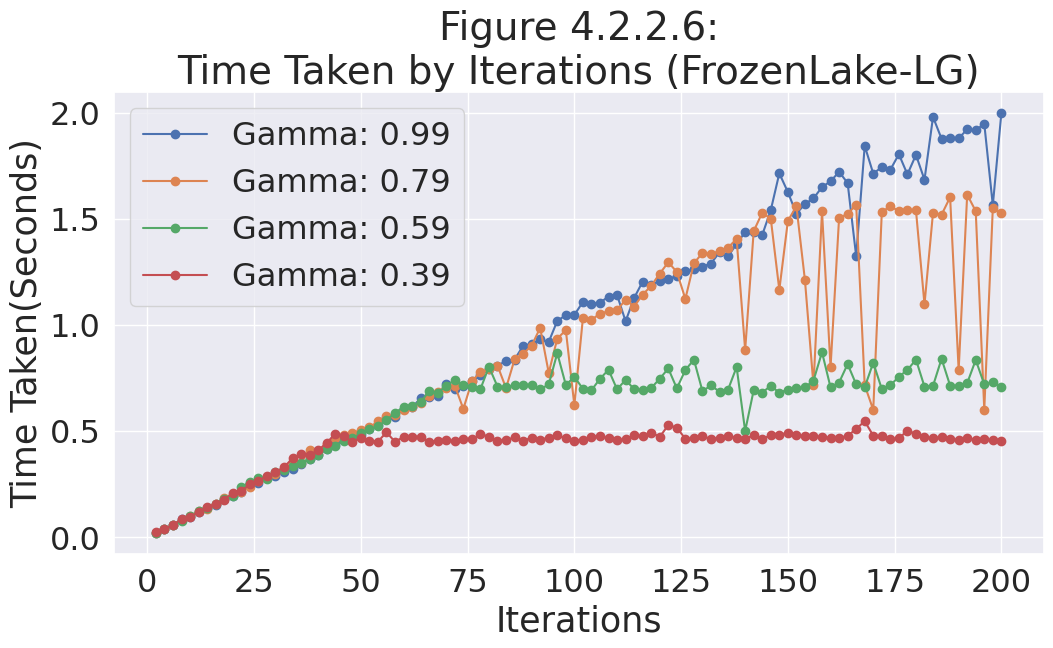

In [100]:
sns.set(font_scale=2.1)
title = "Figure 4.2.2.6:\nTime Taken by Iterations (FrozenLake-LG)"

for i in range(len(gammas)-1,-1,-1):
    plt.plot(itr_vi,run_times_pi_gamma[i],marker='o', label=f'Gamma: {np.round(gammas[i],2)}')


plt.xlabel('Iterations')
plt.ylabel('Time Taken(Seconds)')
plt.title(title,size=28)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(12,6)

plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [47]:
env_lg_slippery_alt.reset(seed=8)
V_pi = None
times_pi = []
for _ in range(5):
    s_time = time.perf_counter()
    V_pi, policy_pi, _ = policy_iteration(env_lg_slippery_alt,discount_factor=0.99)
    times_pi.append(time.perf_counter() - s_time)
    
policy_pi_lg = extract_policy(V_pi, env_lg_slippery_alt)


In [48]:
env_lg_slippery_alt.reset(seed=8)

n_episodes = 1000
wins, rewards_pi = play_episodes(env_lg_slippery_alt, n_episodes, policy_pi_lg, random = False,rewards_aggrated=False)
print(f'Win Percentage with Policy Iteration: {wins/n_episodes*100}%')
print(f"Average rewards with Policy Iteration: {np.mean(rewards_pi)}")
print(f"Average times with Policy Iteration: {np.mean(times_pi)}")

Win Percentage with Policy Iteration: 92.10000000000001%
Average rewards with Policy Iteration: -0.9208699999999981
Average times with Policy Iteration: 2.758145579999996


# Q-LEARNING (LG-Alt)

In [119]:
train_episodes_lg=5000
# learning_rates = np.arange(0.09,1.0,0.1)
learning_rates = [0.1,0.25,0.5,0.75,0.9]
ave_rewards_lr = []
rewards_lr = []
# q_tables_lr = []
times_lr = []
deltas_lr = []
for learning_rate in learning_rates:
    reward, t, _, deltas = q_learning(env_lg_slippery_alt, init_learning_rate = learning_rate, train_episodes = train_episodes_lg, early_stopping=False)
    deltas_lr.append(deltas)
    rewards_lr.append(reward)
    ave_rewards_lr.append(np.mean(reward[-50:]))
#     q_tables_lr.append(q)
#     times_lr.append(np.sum(t))
    times_lr.append(len(t))
    print(f"{learning_rate}: {np.mean(reward[-50:])}")

0.1: -1.1188000000000005
0.25: -1.0690000000000006
0.5: -1.0318000000000007
0.75: -1.0416000000000007
0.9: -1.0110000000000008


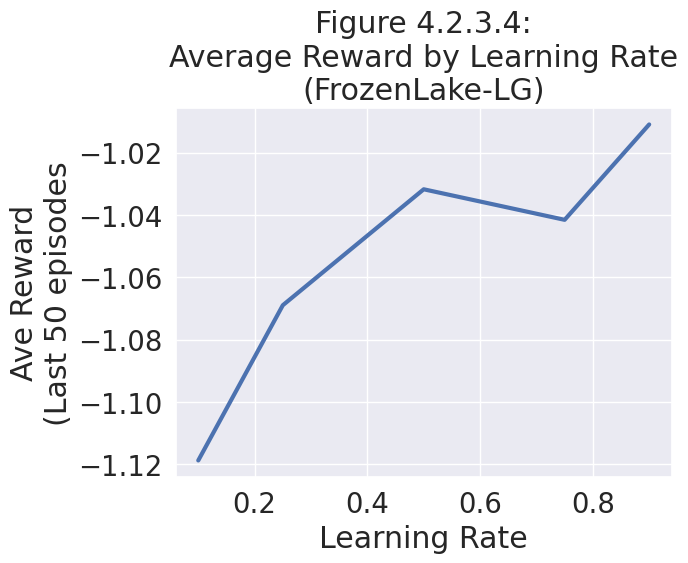

In [121]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.4:\nAverage Reward by Learning Rate\n(FrozenLake-LG)"

plt.plot(learning_rates, ave_rewards_lr, lw=3, label="Rewards")

plt.xlabel("Learning Rate")
plt.ylabel("Ave Reward\n(Last 50 episodes")

plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

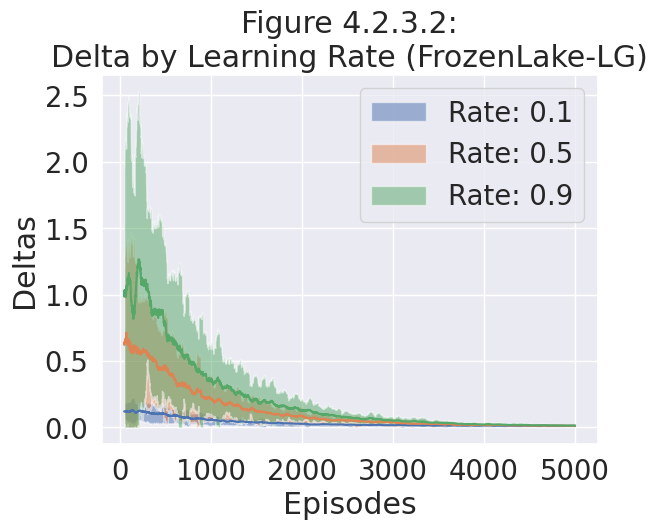

In [122]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.2:\nDelta by Learning Rate (FrozenLake-LG)"

for n in [0,2,4]:
    rates = pd.DataFrame(deltas_lr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_lg), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(learning_rates[n],2)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [123]:
discount_rates = np.arange(0.05,0.96,0.05)
ave_rewards_dr = []
rewards_dr = []
deltas_dr = []
q_tables_dr = []
times_dr = []
for d in discount_rates:
    reward, t, q, deltas = q_learning(env_lg_slippery_alt, discount_factor = d, train_episodes = train_episodes_lg,init_learning_rate=1,early_stopping=False)
    ave_rewards_dr.append(np.mean(reward[-50:]))
    rewards_dr.append(reward)
    deltas_dr.append(deltas)
    q_tables_dr.append(q)
#     times_dr.append(np.mean(t))
    times_dr.append(len(t))
    print(f"{d}: {np.mean(reward[-50:])}")

0.05: -1.0176000000000007
0.1: -1.0000000000000007
0.15000000000000002: -1.0000000000000007
0.2: -1.0000000000000007
0.25: -1.0000000000000007
0.3: -1.0188000000000008
0.35000000000000003: -1.0000000000000007
0.4: -1.0336000000000007
0.45: -1.0000000000000007
0.5: -1.0000000000000007
0.55: -1.0196000000000007
0.6000000000000001: -1.0190000000000006
0.6500000000000001: -1.0186000000000006
0.7000000000000001: -1.0000000000000007
0.7500000000000001: -1.0000000000000007
0.8: -1.0000000000000007
0.8500000000000001: -1.0158000000000007
0.9000000000000001: -0.9948000000000006
0.9500000000000001: -0.9792000000000007


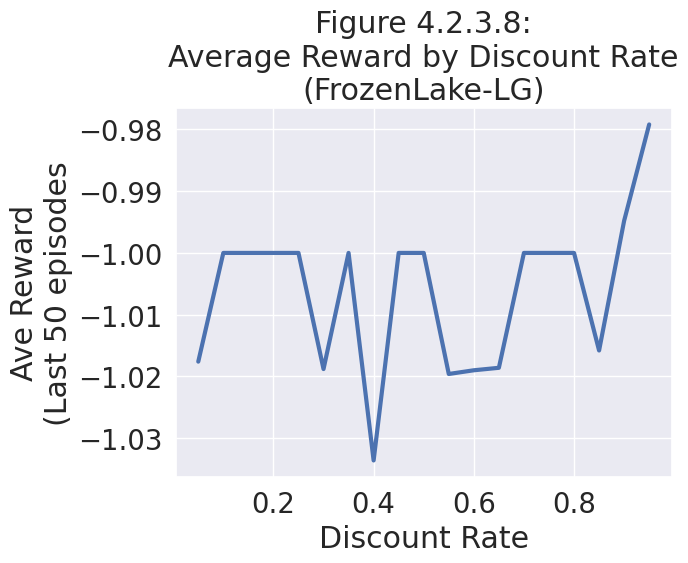

In [125]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.8:\nAverage Reward by Discount Rate\n(FrozenLake-LG)"

plt.plot(discount_rates, ave_rewards_dr, lw=3, label="Rewards")

plt.xlabel("Discount Rate")
plt.ylabel("Ave Reward\n(Last 50 episodes")

plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

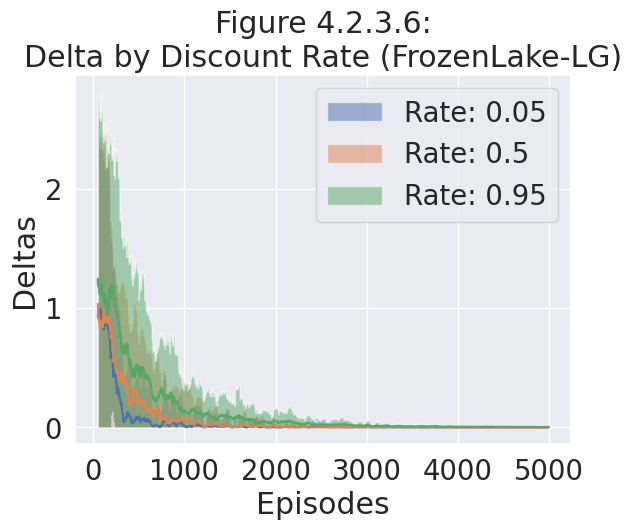

In [127]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.6:\nDelta by Discount Rate (FrozenLake-LG)"

for n in [0,9,18]:
    rates = pd.DataFrame(deltas_dr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_lg), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(discount_rates[n],2)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [132]:
# exploration_decay_rates = np.arange(0,0.1001,0.005)
exploration_decay_rates = np.arange(0.00098,0.102,0.01)
ave_rewards_edr = []
deltas_edr = []
q_tables_edr = []
times_edr = []
env_lg_slippery_alt.reset()
for d in exploration_decay_rates:
    reward, t, q, deltas = q_learning(env_lg_slippery_alt, decay = d,train_episodes=train_episodes_lg, init_learning_rate=1, early_stopping=False)
    ave_rewards_edr.append(np.mean(reward[-50:]))
    deltas_edr.append(deltas)
    q_tables_edr.append(q)
#     times_edr.append(np.mean(t))
    times_edr.append(len(t))
    print(f"{d}: {np.mean(reward[-50:])}")

0.00098: -1.0388000000000008
0.01098: -1.0292000000000008
0.02098: -1.0212000000000006
0.03098: -1.0366000000000009
0.04098: -1.0164000000000006
0.050980000000000004: -0.9794000000000008
0.06098: -1.0000000000000007
0.07098: -1.0000000000000007
0.08098: -1.0084000000000006
0.09097999999999999: -1.0474000000000006
0.10098: -1.0196000000000007


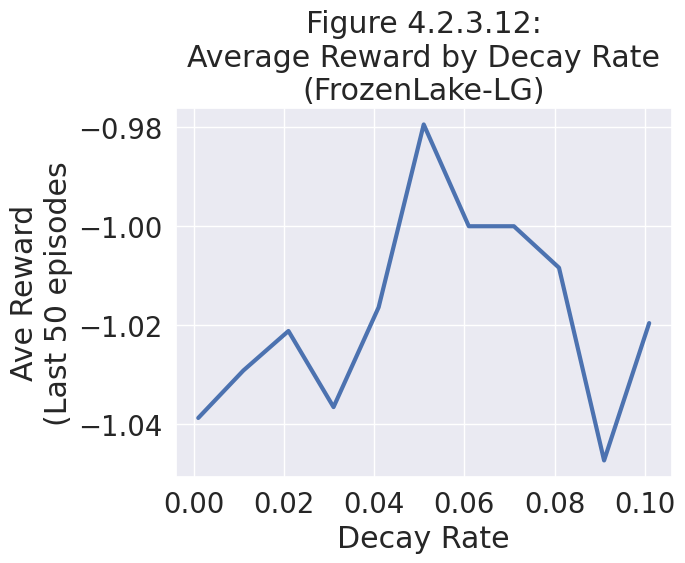

In [133]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.12:\nAverage Reward by Decay Rate\n(FrozenLake-LG)"

plt.plot(exploration_decay_rates, ave_rewards_edr, lw=3, label="Rewards")

plt.xlabel("Decay Rate")
plt.ylabel("Ave Reward\n(Last 50 episodes")

plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

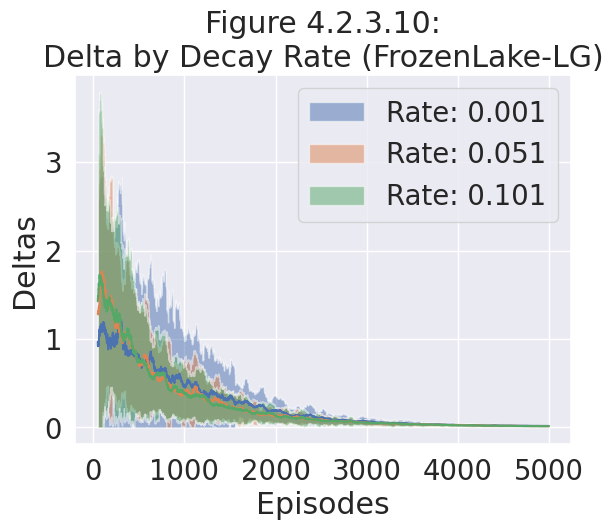

In [134]:
sns.set(font_scale=1.8)
title = "Figure 4.2.3.10:\nDelta by Decay Rate (FrozenLake-LG)"

for n in [0,5,10]:
    rates = pd.DataFrame(deltas_edr[n])
    rates_sma = get_sma(rates, 50)
    st_up, st_down = get_bollinger_bands(rates,50)

    plt.plot(rates_sma)
    plt.fill_between(np.arange(train_episodes_lg), st_up[0], st_down[0], alpha=0.5,label=f'Rate: {np.round(exploration_decay_rates[n],3)}')
    
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Deltas")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [63]:
env_lg_slippery_alt.reset()
V_ql = None
times_ql = []
for _ in range(5):
    s_time = time.perf_counter()
    _, _, _, _ = q_learning(env_lg_slippery_alt,train_episodes=6000, init_learning_rate=1, discount_factor=0.99, decay=0.05, early_stopping=False)
    times_ql.append(time.perf_counter() - s_time)

In [49]:
env_lg_slippery_alt.reset(seed=8)

_,_,Q,_ = q_learning(env_lg_slippery_alt, train_episodes=6000, init_learning_rate=1, discount_factor=0.99, decay=0.015,early_stopping=False)

policy_ql_lg = np.argmax(Q,axis=1)

n_episodes = 1000
wins, rewards_ql = play_episodes(env_lg_slippery_alt, n_episodes, policy_ql_lg, random = False,rewards_aggrated=False)
print(f'Win Percentage with Q-Learning: {wins/n_episodes*100}%')
print(f"Average rewards with Q-Learning: {np.mean(rewards_ql)}")
print(f"Average times with Q-Learning: {np.mean(times_ql)}")

Win Percentage with Q-Learning: 20.8%
Average rewards with Q-Learning: -2.578939999999986


NameError: name 'times_ql' is not defined

# Comparing Policies

In [65]:
np.mean(policy_vi_s==policy_pi_s)

0.953125

In [66]:
np.mean(policy_vi_s==policy_ql_s)

0.765625

In [67]:
np.mean(policy_pi_s==policy_ql_s)

0.78125

In [73]:
61/64 

0.953125

In [113]:
# sns.heatmap((policy_vi_s != policy_pi_s).reshape((8,8)))

In [50]:
policies_s = pd.DataFrame(np.array((policy_vi_s,policy_pi_s,policy_ql_s)).transpose(),columns=["VI","PI","QL"])

c:\users\steve\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


In [51]:
directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

In [52]:
policies_s_arrows = policies_s.copy()
policies_s_arrows[policies_s_arrows==0] = directions[0]
policies_s_arrows[policies_s_arrows==1] = directions[1]
policies_s_arrows[policies_s_arrows==2] = directions[2]
policies_s_arrows[policies_s_arrows==3] = directions[3]

c:\users\steve\appdata\local\programs\python\python37\lib\site-packages\pandas\core\internals\blocks.py:962: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new = convert_scalar(new_values, new)


Text(0.5, 1, 'Figure 5.2:\nPolicies by Algorithm\n(FrozenLake-S)')

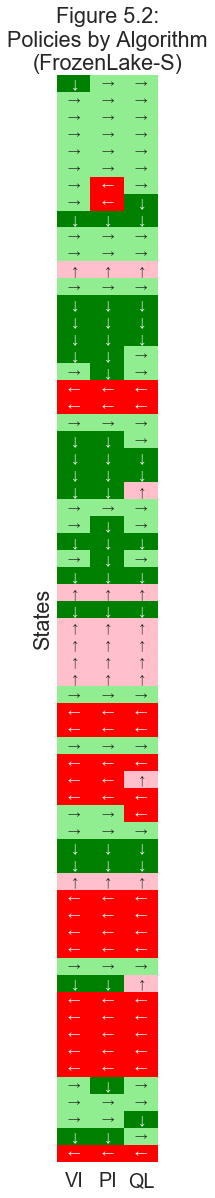

In [53]:
from matplotlib.colors import ListedColormap

sns.set(font_scale=1.8)
title = "Figure 5.2:\nPolicies by Algorithm\n(FrozenLake-S)"

plt.figure(figsize=(1.8,20))

cmap=ListedColormap(['red','green', 'lightgreen', 'pink'])
# cmap = sns.color_palette("tab10", 4) 
ax = sns.heatmap(
    policies_s,
    cmap=cmap,
    yticklabels=False,
    annot=policies_s_arrows,
    fmt="",
    annot_kws={"fontsize": "xx-small"},
    cbar=False
) 
# ax.set_yticks([x for x in range(0,64,4)])
plt.ylabel("States")
plt.title(title)
plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

### Large Problem Set

In [154]:
np.mean(policy_vi_lg==policy_pi_lg)

0.9975

In [155]:
np.mean(policy_vi_lg==policy_ql_lg)

0.6725

In [156]:
np.mean(policy_pi_lg==policy_ql_lg)

0.67

In [157]:
399/400

0.9975

In [113]:
# sns.heatmap((policy_vi_s != policy_pi_s).reshape((8,8)))

In [158]:
policies_lg = pd.DataFrame(np.array((policy_vi_lg,policy_pi_lg,policy_ql_lg)).transpose(),columns=["VI","PI","QL"])

In [159]:
policies_lg_arrows = policies_lg.copy()
policies_lg_arrows[policies_lg_arrows==0] = directions[0]
policies_lg_arrows[policies_lg_arrows==1] = directions[1]
policies_lg_arrows[policies_lg_arrows==2] = directions[2]
policies_lg_arrows[policies_lg_arrows==3] = directions[3]

In [215]:
# from matplotlib.colors import ListedColormap

# sns.set(font_scale=1.8)
# title = "Figure 5.3:\nPolicies by Algorithm\n(FrozenLake-LG)"

# plt.figure(figsize=(1.8,20))

# cmap=ListedColormap(['red','green', 'lightgreen', 'pink'])
# # cmap = sns.color_palette("tab10", 4) 
# ax = sns.heatmap(
#     policies_lg,
#     cmap=cmap,
#     yticklabels=False,
# ) 
# # ax.set_yticks([x for x in range(0,64,4)])
# colorbar = ax.collections[0].colorbar 
# r = colorbar.vmax - colorbar.vmin 
# colorbar.set_ticks([colorbar.vmin + r / 4 * (0.5 + i) for i in range(4)])
# colorbar.set_ticklabels(list(directions.values())) 
# plt.ylabel("States")
# plt.title(title)
# # plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [102]:
def create_arrow_policy(env, policy):
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    size = len(env.render())
    policy_arrows = np.array([directions[col] for col in policy]).reshape((size,size))
    env_render = env.render()

    for r in range(len(env_render)):
        row = ''
        for c in range(len(env_render[r])):
            env_render[r][c] = env_render[r][c].decode()

    env_render = np.array(env_render)
    
    policy_arrows[env_render=='H'] = 'H'
    policy_arrows[env_render=='S'] = 'S'
    policy_arrows[env_render=='G'] = 'G'
    
    return policy_arrows

In [193]:
test = create_arrow_policy(env_s_slippery_alt,policy_ql_s)

In [197]:
env_s_slippery_alt.observation_space

Discrete(64)

In [211]:
directions_colors = {
    'S':"blue",
    '←':"pink",
    '↑':"red",
    '→':"lightgreen",
    'H':"black",
    '↓':"green",
    'G':"gold"
}

Text(0.5, 1.0, 'Figure 5.3:\nQ-Learning Policy\n(FrozenLake-LG)')

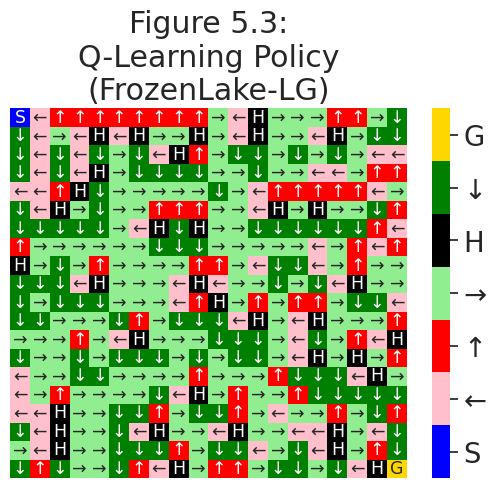

In [214]:
sns.set(font_scale=1.8)
title = "Figure 5.3:\nQ-Learning Policy\n(FrozenLake-LG)"

# plt.figure(figsize=(1.8,20))

df = pd.DataFrame(create_arrow_policy(env_lg_slippery_alt,policy_ql_lg))

value_to_int = {j:i for i,j in enumerate(pd.unique(df.values.ravel()))} # like you did
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
colors = [directions_colors[l] for l in list(value_to_int.keys())]
# cmap = ListedColormap(['blue','pink','red', 'lightgreen', 'black','green','gold'])
cmap = ListedColormap(colors)
# cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(df.replace(value_to_int),yticklabels=False,xticklabels=False, cmap=cmap,annot=df,fmt="",annot_kws={"fontsize": "xx-small"}) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.title(title)
# plt.savefig(title.replace(".","").replace("\n","")+".svg",bbox_inches="tight")

In [217]:
get_score(env_lg_slippery_alt,policy_ql_lg)

----------------------------------------------
Number of Episodes (534) truncated
You took an average of 208 steps to get the frisbee
And you fell in the hole 45.28 % of the times
Loses: 211
Wins: 255
----------------------------------------------


In [220]:
255/(1000-534)

0.5472103004291845